<a href="https://colab.research.google.com/github/likeshd/time_series_models_libraries/blob/main/new_co2_emission_analysis_autoTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [8]:
data = pd.read_excel("/content/co2_analysis.xlsx")
data.head(5)

,year,month,carbonEmission
0,2015,1,150
1,2015,2,149
2,2015,3,149
3,2015,4,148
4,2015,5,148


In [9]:
# Create a new column named 'datetime' in datetime format
data['ds'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1))
# data.set_index(data['ds'], inplace = True)
print(data.head())

   year  month  carbonEmission         ds
0  2015      1             150 2015-01-01
1  2015      2             149 2015-02-01
2  2015      3             149 2015-03-01
3  2015      4             148 2015-04-01
4  2015      5             148 2015-05-01


In [10]:

data.drop(["year", "month"], axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   carbonEmission  108 non-null    int64         
 1   ds              108 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [17]:
data.drop_duplicates(subset=['ds'])
data.describe()


,carbonEmission,ds
count,108.000000,108
mean,124.138889,2019-06-20 04:13:20
min,111.000000,2015-01-01 00:00:00
25%,116.000000,2017-03-24 06:00:00
50%,118.000000,2019-07-16 12:00:00
75%,132.250000,2021-09-08 12:00:00
max,150.000000,2023-12-01 00:00:00
std,11.564899,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2015-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   carbonEmission  108 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


In [6]:
!pip install autots


In [7]:
data.describe()


,carbonEmission
count,108.000000
mean,124.138889
std,11.564899
min,111.000000
25%,116.000000
50%,118.000000
75%,132.250000
max,150.000000


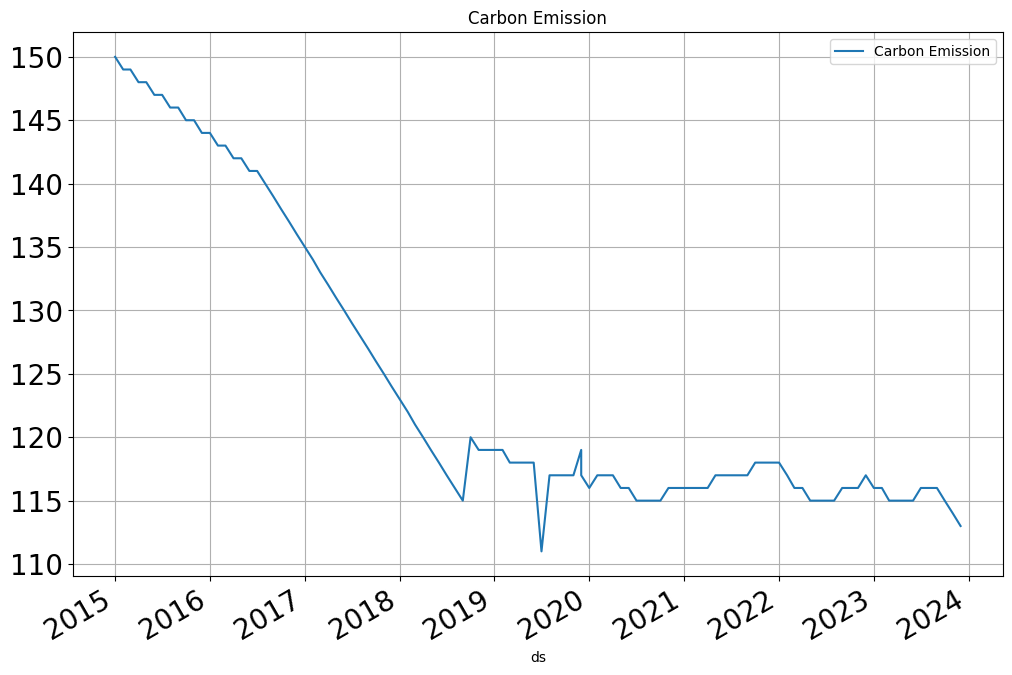

In [8]:
data["carbonEmission"].plot(figsize=(12, 8), title="Carbon Emission", fontsize=20, label="Carbon Emission")
plt.legend()
plt.grid()
plt.show()

In [21]:
from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data,date_col='ds', value_col='carbonEmission', id_col=None)

Using 1 cpus for n_jobs.
Data frequency is: MS, used frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50
4/4 [==============================] - 6s 9ms/step - loss: 0.3683
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3659
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3634
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3624
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3632
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3645
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3622
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3609
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3630
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3638
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3624
Epoch 12/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3633
Epoch

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 31 with model FBProphet in generation 0 of 20


DEBUG:cmdstanpy:input tempfile: /tmp/tmpiz7qmoju/z4nq_dhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiz7qmoju/3dhu7ipw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18055', 'data', 'file=/tmp/tmpiz7qmoju/z4nq_dhg.json', 'init=/tmp/tmpiz7qmoju/3dhu7ipw.json', 'output', 'file=/tmp/tmpiz7qmoju/prophet_modellkzhts1j/prophet_model-20240426092327.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:23:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:23:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Model Number: 40 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 40 in generation 0: VECM
Model Number: 41 wi

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


Model Number: 99 with model Theta in generation 0 of 20
Model Number: 100 with model ETS in generation 0 of 20
Model Number: 101 with model DatepartRegression in generation 0 of 20
Model Number: 102 with model LastValueNaive in generation 0 of 20
Model Number: 103 with model WindowRegression in generation 0 of 20
Model Number: 104 with model SeasonalityMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=99) out of bounds (59)') in model 104 in generation 0: SeasonalityMotif
Model Number: 105 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105 in generation 0: VAR
Model Number: 106 with model ETS in generation 0 of 20
Model Number: 107 with model SeasonalityMotif in generation 0 of 20
Model Number: 108 with model UnivariateMotif in generation 0 of 20
Model Number: 109 with model LastValueNaive in generation 0 of 20
Model Number: 110 with model SeasonalNaive in generation 0 of 20
Model Number: 111 with model Uni

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.989e+00, tolerance: 2.529e-01
  model = cd_fast.enet_coordinate_descent(


Model Number: 118 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 118 in generation 0: VAR
Model Number: 119 with model MetricMotif in generation 0 of 20
Model Number: 120 with model GLM in generation 0 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 120 in generation 0: GLM
Model Number: 121 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 121 in generation 0: SectionalMotif
Model Number: 122 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 122 in generation 0: DatepartRegression
Model Number: 123 with model SeasonalityMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=99) out of bounds (98)') in model 123 in generation 0: SeasonalityMotif
Model Number: 124 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 136 with model UnobservedComponents in generation 0 of 20
Model Number: 137 with model ARDL in generation 0 of 20
Model Number: 138 with model WindowRegression in generation 0 of 20
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 138 in generation 0: WindowRegression
Model Number: 139 with model MetricMotif in generation 0 of 20
Model Number: 140 with model ARDL in generation 0 of 20
Model Number: 141 with model SectionalMotif in generation 0 of 20
Model Number: 142 with model WindowRegression in generation 0 of 20
Model Number: 143 with model ConstantNaive in generation 0 of 20
Model Number: 144 with model WindowRegression in generation 0 of 20
Template Eval Error: LightGBMError('Unknown objective type name: regression,mape') in model 144 in generation 0: WindowRegression
Model Number: 145 with model UnobservedComponents in generation 0 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 170 with model ARIMA in generation 0 of 20
Model Number: 171 with model ETS in generation 0 of 20
Model Number: 172 with model UnivariateMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=100) out of bounds (82)') in model 172 in generation 0: UnivariateMotif
Model Number: 173 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 173 in generation 0: ARCH
Model Number: 174 with model LastValueNaive in generation 0 of 20
Model Number: 175 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 175 in generation 0: VAR
Model Number: 176 with model UnobservedComponents in generation 0 of 20
Model Number: 177 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 177 in generation 0: DatepartRegression
Model Number: 178 with model AverageValueN

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 182 with model MultivariateMotif in generation 1 of 20
Model Number: 183 with model AverageValueNaive in generation 1 of 20
Model Number: 184 with model SeasonalNaive in generation 1 of 20
Model Number: 185 with model DatepartRegression in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 2}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 185 in generation 1: DatepartRegression
Model Number: 186 with model SeasonalityMotif in generation 1 of 20
Model Number: 187 with model NVAR in generation 1 of 20
Model Number: 188 with model MultivariateRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 188 in generation 1: MultivariateRegression
Model Number: 189 with model NVAR in generation 1 of 20
Model Number: 190 with model ARDL in generation 1 of 20
Model Number: 191 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 206 with model ConstantNaive in generation 1 of 20
Model Number: 207 with model AverageValueNaive in generation 1 of 20
Model Number: 208 with model ConstantNaive in generation 1 of 20
Model Number: 209 with model GLM in generation 1 of 20
Model Number: 210 with model SectionalMotif in generation 1 of 20
Model Number: 211 with model LastValueNaive in generation 1 of 20
Model Number: 212 with model UnobservedComponents in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


Model Number: 213 with model NVAR in generation 1 of 20
Model Number: 214 with model ETS in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'det_order': -1, 'k_ar_diff': 1}}") in model 214 in generation 1: ETS
Model Number: 215 with model NVAR in generation 1 of 20
Model Number: 216 with model ETS in generation 1 of 20
Model Number: 217 with model SectionalMotif in generation 1 of 20
Model Number: 218 with model NVAR in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'method': 'rolling_zscore', 'method_params': {'distribution': 'uniform', 'alph

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 239 with model MultivariateRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 239 in generation 1: MultivariateRegression
Model Number: 240 with model WindowRegression in generation 1 of 20
Model Number: 241 with model GLM in generation 1 of 20
Model Number: 242 with model ETS in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 243 with model NVAR in generation 1 of 20
Model Number: 244 with model MultivariateRegression in generation 1 of 20
Model Number: 245 with model UnobservedComponents in generation 1 of 20
Model Number: 246 with model GLM in generation 1 of 20
Model Number: 247 with model UnivariateMotif in generation 1 of 20
Model Number: 248 with model UnivariateMotif in generation 1 of 20
Model Number: 249 with model SectionalMotif in generation 1 of 20
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params akima {'0': {'lag_1': 12, 'method': 'LastValue'}, '1': {'fillna': 'SeasonalityMotifImputer1K', 'center': 'median'}}") in model 249 in generation 1: SectionalMotif
Model Number: 250 with model LastValueNaive in generation 1 of 20
Model Number: 251 with model GLS in generation 1 of 20
Model Number: 252 with model DatepartRegression in generation 1 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_fore

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 258 with model UnobservedComponents in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 258 in generation 1: UnobservedComponents
Model Number: 259 with model GLS in generation 1 of 20
Model Number: 260 with model ARDL in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 260 in generation 1: ARDL
Model Number: 261 with model DatepartRegression in generation 1 of 20
Model Number: 262 with model UnivariateMotif in generation 1 of 20
Model Number: 263 with model SeasonalNaive in generation 1 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'model_name': 'ucm_deterministic_trend', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.01, 0], [0, 0.01]], 'observation_model': [[1, 0]], 'observation_noise': 0.1, 'em_iter': 10}, '1': {'output_distribution': 'normal', 'n_quantiles': 32}, '2': {

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 286 with model ConstantNaive in generation 1 of 20
Model Number: 287 with model ConstantNaive in generation 1 of 20
Model Number: 288 with model UnivariateMotif in generation 1 of 20
Model Number: 289 with model MetricMotif in generation 1 of 20
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 289 in generation 1: MetricMotif
Model Number: 290 with model WindowRegression in generation 1 of 20
Model Number: 291 with model WindowRegression in generation 1 of 20
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 291 in generation 1: WindowRegression
Model Number: 292 with model MultivariateRegression in generation 1 of 20
Model Number: 293 with model Theta in generation 1 of 20
Model Number: 294 with model UnivariateMotif in generation 1 of 20
Model Number: 295 with model UnivariateRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supp

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 307 in generation 2: DatepartRegression
Model Number: 308 with model AverageValueNaive in generation 2 of 20
Model Number: 309 with model GLM in generation 2 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 309 in generation 2: GLM
Model Number: 310 with model GLS in generation 2 of 20
Model Number: 311 with model MultivariateRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 311 in generation 2: MultivariateRegression
Model Number: 312 with model UnivariateRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 312 in generation 2: UnivariateRegression
Model Number: 313 with model AverageValueNaive in generation 2 of 20
Model Number: 314 with 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 316 with model GLS in generation 2 of 20
Model Number: 317 with model WindowRegression in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 318 with model LastValueNaive in generation 2 of 20
Model Number: 319 with model Theta in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 320 with model FBProphet in generation 2 of 20
Model Number: 321 with model MetricMotif in generation 2 of 20
Model Number: 322 with model ARIMA in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 323 with model NVAR in generation 2 of 20
Model Number: 324 with model MetricMotif in generation 2 of 20
Model Number: 325 with model Theta in generation 2 of 20
Model Number: 326 with model NVAR in generation 2 of 20
Model Number: 327 with model LastValueNaive in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 328 with model ARIMA in generation 2 of 20
Model Number: 329 with model MultivariateRegression in generation 2 of 20
Model Number: 330 with model SectionalMotif in generation 2 of 20
Model Number: 331 with model AverageValueNaive in generation 2 of 20
Model Number: 332 with model LastValueNaive in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '2': {}, '3': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '4': {'output_distribution': 'uniform', 'n_quantiles': 32}}") in model 332 in generation 2: LastValueNaive
Model Number: 333 with model UnivariateRegression in generation 2 of 20
Model Number: 334 with model ConstantNaive in generation 2 of 20
Model Number: 335 wit

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 342 with model ETS in generation 2 of 20
Model Number: 343 with model GLS in generation 2 of 20
Model Number: 344 with model NVAR in generation 2 of 20
Model Number: 345 with model SectionalMotif in generation 2 of 20
Model Number: 346 with model AverageValueNaive in generation 2 of 20
Model Number: 347 with model AverageValueNaive in generation 2 of 20
Model Number: 348 with model MultivariateRegression in generation 2 of 20
Model Number: 349 with model DatepartRegression in generation 2 of 20
Model Number: 350 with model SectionalMotif in generation 2 of 20
Model Number: 351 with model SectionalMotif in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 352 with model MultivariateRegression in generation 2 of 20
Model Number: 353 with model MultivariateMotif in generation 2 of 20
Model Number: 354 with model LastValueNaive in generation 2 of 20
Model Number: 355 with model ConstantNaive in generation 2 of 20
Model Number: 356 with model MultivariateMotif in generation 2 of 20
Model Number: 357 with model UnivariateMotif in generation 2 of 20
Model Number: 358 with model LastValueNaive in generation 2 of 20
Model Number: 359 with model MetricMotif in generation 2 of 20
Model Number: 360 with model SectionalMotif in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'threshold': 0.9, 'splash_threshold': 0.85, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 405 with model SeasonalityMotif in generation 2 of 20
Model Number: 406 with model Theta in generation 2 of 20
Model Number: 407 with model Theta in generation 2 of 20
Model Number: 408 with model UnivariateRegression in generation 2 of 20
Model Number: 409 with model AverageValueNaive in generation 2 of 20
Model Number: 410 with model AverageValueNaive in generation 2 of 20
Model Number: 411 with model SectionalMotif in generation 2 of 20
Model Number: 412 with model SeasonalNaive in generation 2 of 20
Model Number: 413 with model ETS in generation 2 of 20
Model Number: 414 with model ConstantNaive in generation 2 of 20
Model Number: 415 with model GLM in generation 2 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 415 in generation 2: GLM
Model Number: 416 with model GLM in generation 2 of 20
Model Number: 417 with model ConstantNaive in generation 2 of 20
Model Number: 418 with model GLS in generat

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-m

Model Number: 420 with model FBProphet in generation 2 of 20
Model Number: 421 with model MultivariateMotif in generation 2 of 20
Model Number: 422 with model ARIMA in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 422 in generation 2: ARIMA
Model Number: 423 with model ARDL in generation 2 of 20
Model Number: 424 with model AverageValueNaive in generation 2 of 20
Model Number: 425 with model GLM in generation 2 of 20
Model Number: 426 with model ConstantNaive in generation 2 of 20
Model Number: 427 with model MultivariateMotif in generation 2 of 20
Model Number: 428 with model Theta in generation 2 of 20
Model Number: 429 with model Theta in generation 2 of 20
Model Number: 430 with model MultivariateRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 430 in generation 2: MultivariateRegression
Model Number: 431 with model ARDL in 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.697e+03, tolerance: 1.820e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 446 with model MetricMotif in generation 3 of 20
Model Number: 447 with model FBProphet in generation 3 of 20
No anomalies detected.
Model Number: 448 with model LastValueNaive in generation 3 of 20
Model Number: 449 with model SeasonalityMotif in generation 3 of 20
Model Number: 450 with model ConstantNaive in generation 3 of 20
Model Number: 451 with model LastValueNaive in generation 3 of 20
Model Number: 452 with model ConstantNaive in generation 3 of 20
Model Number: 453 with model AverageValueNaive in generation 3 of 20
Model Number: 454 with model UnivariateMotif in generation 3 of 20
Model Number: 455 with model ARDL in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'output_distribution': 'uniform', 'n_quant

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 465 with model WindowRegression in generation 3 of 20
Model Number: 466 with model Theta in generation 3 of 20
Model Number: 467 with model SectionalMotif in generation 3 of 20
Model Number: 468 with model ARIMA in generation 3 of 20
Model Number: 469 with model ETS in generation 3 of 20
Model Number: 470 with model MetricMotif in generation 3 of 20
Model Number: 471 with model UnivariateRegression in generation 3 of 20
Model Number: 472 with model ConstantNaive in generation 3 of 20
Model Number: 473 with model AverageValueNaive in generation 3 of 20
Model Number: 474 with model SectionalMotif in generation 3 of 20
Model Number: 475 with model NVAR in generation 3 of 20
Model Number: 476 with model ConstantNaive in generation 3 of 20
Model Number: 477 with model MultivariateRegression in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.939e-01, tolerance: 8.780e-04
  model = cd_fast.enet_coordinate_descent(


Model Number: 478 with model Theta in generation 3 of 20
Model Number: 479 with model GLM in generation 3 of 20
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params cubic {'0': {'fillna': 'SeasonalityMotifImputerLinMix', 'center': 'median'}, '1': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 479 in generation 3: GLM
Model Number: 480 with model DatepartRegression in generation 3 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05, 'rolling_periods': 300, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_met

/usr/local/lib/python3.10/dist-packages/autots/tools/seasonal.py:630: RuntimeWarning: invalid value encountered in divide
  scores = np.mean(np.abs(a - b) / divisor, axis=2)


Model Number: 482 with model FBProphet in generation 3 of 20
Model Number: 483 with model MetricMotif in generation 3 of 20
Model Number: 484 with model SectionalMotif in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params quadratic {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 484 in generation 3: SectionalMotif
Model Number: 485 with model ConstantNaive in generation 3 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'piecewise_polynomial', 'transformations': {'0': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 0.7, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 485 in generation 3: ConstantNaive
Model Number: 486 with model UnobservedCompon

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 516 with model MultivariateMotif in generation 3 of 20
Model Number: 517 with model WindowRegression in generation 3 of 20
Model Number: 518 with model ARDL in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 519 with model Theta in generation 3 of 20
Model Number: 520 with model MultivariateRegression in generation 3 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 300, 'center': True}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False}, '3': {'det_order': 1, 'k_ar_diff': 2}, '4': {'n_harmonics': 0.5, 'detrend': None}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 520 in generation 3: MultivariateRegression
Model Numbe

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 526 with model ARIMA in generation 3 of 20
Model Number: 527 with model ARIMA in generation 3 of 20
Model Number: 528 with model LastValueNaive in generation 3 of 20
Model Number: 529 with model ConstantNaive in generation 3 of 20
Model Number: 530 with model MetricMotif in generation 3 of 20
Model Number: 531 with model NVAR in generation 3 of 20
Model Number: 532 with model LastValueNaive in generation 3 of 20
Model Number: 533 with model ARIMA in generation 3 of 20
Model Number: 534 with model LastValueNaive in generation 3 of 20
Model Number: 535 with model MetricMotif in generation 3 of 20
Model Number: 536 with model UnivariateMotif in generation 3 of 20
Model Number: 537 with model UnobservedComponents in generation 3 of 20
Model Number: 538 with model UnobservedComponents in generation 3 of 20
Model Number: 539 with model LastValueNaive in generation 3 of 20
Model Number: 540 with model NVAR in generation 3 of 20
Model Number: 541 with model UnobservedComponents i

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.430e+02, tolerance: 1.332e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 543 in generation 3: DatepartRegression
Model Number: 544 with model Theta in generation 3 of 20
Model Number: 545 with model UnivariateRegression in generation 3 of 20
Model Number: 546 with model ConstantNaive in generation 3 of 20
Model Number: 547 with model SectionalMotif in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'whiten': False}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': True}}") in model 547 in generation 3: SectionalMotif
Model Number: 548 with model AverageValueNaive in generation 3 of 20
Model Number: 549 with model SeasonalityMotif in generation 3 of 20
Model Number: 550 with model MultivariateMotif in generation 3 of 20
Template Eval Erro

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 562 with model UnivariateMotif in generation 4 of 20
Model Number: 563 with model AverageValueNaive in generation 4 of 20
Model Number: 564 with model ARDL in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 564 in generation 4: ARDL
Model Number: 565 with model UnivariateMotif in generation 4 of 20
Model Number: 566 with model MetricMotif in generation 4 of 20
Model Number: 567 with model AverageValueNaive in generation 4 of 20
Model Number: 568 with model AverageValueNaive in generation 4 of 20
Model Number: 569 with model MetricMotif in generation 4 of 20
Model Number: 570 with model DatepartRegression in generation 4 of 20
Model Number: 571 with model NVAR in generation 4 of 20
Model Number: 572 with model LastValueNaive in generation 4 of 20
Model Number: 573 with model SeasonalityMotif in generation 4 of 20
Model Number: 574 with model UnobservedComponents in generation 4 of 20
Model Number: 575 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 601 with model FBProphet in generation 4 of 20
No anomalies detected.
Model Number: 602 with model Theta in generation 4 of 20
Model Number: 603 with model ARIMA in generation 4 of 20
Model Number: 604 with model MetricMotif in generation 4 of 20
Model Number: 605 with model GLS in generation 4 of 20
Model Number: 606 with model FBProphet in generation 4 of 20
No anomalies detected.
Model Number: 607 with model SectionalMotif in generation 4 of 20
Model Number: 608 with model UnobservedComponents in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 608 in generation 4: UnobservedComponents
Model Number: 609 with model LastValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 0.5}, '1': {'output_distribution': 'uniform', 'n_quantiles': 16}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {}, '4': {'rows': 7

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 613 with model Theta in generation 4 of 20
Model Number: 614 with model Theta in generation 4 of 20
Model Number: 615 with model ARDL in generation 4 of 20
Model Number: 616 with model ARIMA in generation 4 of 20
Model Number: 617 with model SectionalMotif in generation 4 of 20
Model Number: 618 with model MultivariateMotif in generation 4 of 20
Model Number: 619 with model SeasonalityMotif in generation 4 of 20
Model Number: 620 with model UnobservedComponents in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 620 in generation 4: UnobservedComponents
Model Number: 621 with model DatepartRegression in generation 4 of 20
Model Number: 622 with model MetricMotif in generation 4 of 20
Model Number: 623 with model LastValueNaive in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 624 with model SeasonalityMotif in generation 4 of 20
Model Number: 625 with model ARIMA in generation 4 of 20
Model Number: 626 with model WindowRegression in generation 4 of 20
Model Number: 627 with model ConstantNaive in generation 4 of 20
Model Number: 628 with model UnivariateMotif in generation 4 of 20
Model Number: 629 with model MultivariateRegression in generation 4 of 20
Model Number: 630 with model SectionalMotif in generation 4 of 20
Model Number: 631 with model ARDL in generation 4 of 20
Template Eval Error: ValueError("ARDL series carbonEmission failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             HolidayFlag_US\nds                        \n2015-01-01             1.0\n2015-02-01             0.0\n2015-03-01             0.0\n2015-04-01             0.0\n2015-05-01             0.0\n...                    ...\n2022-10-01             0.0\n2022-11-01             0.0\n2022-12-01             0.0\n2023-01-01   

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 639 with model NVAR in generation 4 of 20
Model Number: 640 with model LastValueNaive in generation 4 of 20
Model Number: 641 with model AverageValueNaive in generation 4 of 20
Model Number: 642 with model UnivariateRegression in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {'det_order': -1, 'k_ar_diff': 2}}") in model 642 in generation 4: UnivariateRegression
Model Number: 643 with model UnobservedComponents in generation 4 of 20
Model Number: 644 with model GLM in generation 4 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 644 in generation 4: GLM
Model Number: 645 with model MetricMotif in generation 4 of 20
Model Number: 646 with model ARDL in generation 4 of 20
Model Number: 647 with model WindowRegression in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/

Model Number: 648 with model ARIMA in generation 4 of 20
Model Number: 649 with model UnivariateMotif in generation 4 of 20
Template Eval Error: ValueError('kth(=100) out of bounds (82)') in model 649 in generation 4: UnivariateMotif
Model Number: 650 with model MetricMotif in generation 4 of 20
Model Number: 651 with model FBProphet in generation 4 of 20
No anomalies detected.
Model Number: 652 with model MultivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'lag_1': 364, 'method': 2}, '1': {'output_distribution': 'normal', 'n_quantiles': 32}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 652 in generation 4: MultivariateMotif
Model Number: 653 with model ARIMA in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 654 with model LastValueNaive in generation 4 of 20
Model Number: 655 with model NVAR in generation 4 of 20
Model Number: 656 with model UnivariateMotif in generation 4 of 20
Model Number: 657 with model MultivariateMotif in generation 4 of 20
Model Number: 658 with model LastValueNaive in generation 4 of 20
Model Number: 659 with model UnivariateRegression in generation 4 of 20
Model Number: 660 with model ConstantNaive in generation 4 of 20
Model Number: 661 with model SectionalMotif in generation 4 of 20
Model Number: 662 with model UnivariateRegression in generation 4 of 20
Model Number: 663 with model GLS in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 664 with model MultivariateRegression in generation 4 of 20
Model Number: 665 with model MultivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer DifferencedTransformer failed on inverse from params ffill {'0': {'fixed': True, 'window': 12, 'macro_micro': False, 'center': True}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': True}, '4': {'whiten': False}}") in model 665 in generation 4: MultivariateMotif
Model Number: 666 with model ARIMA in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 666 in generation 4: ARIMA
Model Number: 667 with model SectionalMotif in generation 4 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 20}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30506e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 673 with model LastValueNaive in generation 4 of 20
Model Number: 674 with model MultivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}, '2': {}, '3': {}}") in model 674 in generation 4: MultivariateMotif
Model Number: 675 with model UnobservedComponents in generation 4 of 20
Model Number: 676 with model Theta in generation 4 of 20
Model Number: 677 with model MetricMotif in generation 4 of 20
Model Number: 678 with model Theta in generation 4 of 20
Model Number: 679 with model UnobservedComponents in generation 4 of 20
Model Number: 680 with model GLM in generation 4 of 20
Model Number: 681 with model SectionalMotif in generation 4 of 20
New Generation: 5 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 682 with model UnivariateRegression in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 682 in generation 5: UnivariateRegression
Model Number: 683 with model MultivariateRegression in generation 5 of 20
Model Number: 684 with model UnivariateMotif in generation 5 of 20
Model Number: 685 with model ARDL in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 685 in generation 5: ARDL
Model Number: 686 with model UnobservedComponents in generation 5 of 20
Model Number: 687 with model SectionalMotif in generation 5 of 20
Model Number: 688 with model NVAR in generation 5 of 20
Model Number: 689 with model AverageValueNaive in generation 5 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 690 with model DatepartRegression in generation 5 of 20
Model Number: 691 with model MultivariateRegression in generation 5 of 20
Model Number: 692 with model ARDL in generation 5 of 20
Model Number: 693 with model NVAR in generation 5 of 20
Model Number: 694 with model FBProphet in generation 5 of 20
Model Number: 695 with model MetricMotif in generation 5 of 20
Model Number: 696 with model SeasonalityMotif in generation 5 of 20
Model Number: 697 with model ConstantNaive in generation 5 of 20
Model Number: 698 with model ETS in generation 5 of 20
Model Number: 699 with model ARDL in generation 5 of 20
Template Eval Error: ValueError("ARDL series carbonEmission failed with error IndexError('tuple index out of range') exog train None and predict None") in model 699 in generation 5: ARDL
Model Number: 700 with model Theta in generation 5 of 20
Model Number: 701 with model ARIMA in generation 5 of 20
Model Number: 702 with model ARDL in generation 5 of 20
Model Number: 703 w

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 705 with model LastValueNaive in generation 5 of 20
Model Number: 706 with model NVAR in generation 5 of 20
Model Number: 707 with model WindowRegression in generation 5 of 20
Model Number: 708 with model SeasonalityMotif in generation 5 of 20
Model Number: 709 with model Theta in generation 5 of 20
Model Number: 710 with model ARDL in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 710 in generation 5: ARDL
Model Number: 711 with model SeasonalityMotif in generation 5 of 20
Model Number: 712 with model GLS in generation 5 of 20
Model Number: 713 with model UnobservedComponents in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params quadratic {'0':

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 729 with model NVAR in generation 5 of 20
Model Number: 730 with model MultivariateMotif in generation 5 of 20
Model Number: 731 with model SectionalMotif in generation 5 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 731 in generation 5: SectionalMotif
Model Number: 732 with model AverageValueNaive in generation 5 of 20
Model Number: 733 with model MultivariateRegression in generation 5 of 20
Model Number: 734 with model NVAR in generation 5 of 20
Model Number: 735 with model MultivariateMotif in generation 5 of 20
Model Number: 736 with model NVAR in generation 5 of 20
Model Number: 737 with model ConstantNaive in generation 5 of 20
Model Number: 738 with model ARIMA in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 738 in generation 5: ARIMA
Model Number: 739 with model Theta in generation 5 of 20
Model Number: 740 with model MetricMotif 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 759 with model SeasonalityMotif in generation 5 of 20
Model Number: 760 with model UnivariateRegression in generation 5 of 20
Model Number: 761 with model MetricMotif in generation 5 of 20
Model Number: 762 with model SeasonalityMotif in generation 5 of 20
Model Number: 763 with model UnobservedComponents in generation 5 of 20
Model Number: 764 with model WindowRegression in generation 5 of 20
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 764 in generation 5: WindowRegression
Model Number: 765 with model NVAR in generation 5 of 20
Model Number: 766 with model SeasonalityMotif in generation 5 of 20
Model Number: 767 with model MultivariateMotif in generation 5 of 20
Model Number: 768 with model NVAR in generation 5 of 20
Model Number: 769 with model ARIMA in generation 5 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.065e+03, tolerance: 2.882e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 770 with model ARIMA in generation 5 of 20
Model Number: 771 with model LastValueNaive in generation 5 of 20
Model Number: 772 with model AverageValueNaive in generation 5 of 20
Model Number: 773 with model ConstantNaive in generation 5 of 20
Model Number: 774 with model UnivariateMotif in generation 5 of 20
Model Number: 775 with model Theta in generation 5 of 20
Model Number: 776 with model ARDL in generation 5 of 20
Template Eval Error: ValueError("ARDL series carbonEmission failed with error IndexError('tuple index out of range') exog train None and predict None") in model 776 in generation 5: ARDL
Model Number: 777 with model ARIMA in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 777 in generation 5: ARIMA
Model Number: 778 with model UnivariateRegression in generation 5 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params akima {'0': {'rows': 1, 'lag':

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 851 with model UnivariateMotif in generation 6 of 20
Model Number: 852 with model Theta in generation 6 of 20
Model Number: 853 with model SectionalMotif in generation 6 of 20
Model Number: 854 with model MultivariateMotif in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'output_distribution': 'uniform', 'n_quantiles': 32}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}}") in model 854 in generation 6: MultivariateMotif
Model Number: 855 with model UnobservedComponents in generation 6 of 20
Model Number: 856 with model ARDL in generation 6 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'method': 'remove', 'std_threshold'

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparat

Model Number: 870 with model NVAR in generation 6 of 20
Model Number: 871 with model NVAR in generation 6 of 20
Model Number: 872 with model ETS in generation 6 of 20
Model Number: 873 with model GLS in generation 6 of 20
Model Number: 874 with model NVAR in generation 6 of 20
Model Number: 875 with model SeasonalityMotif in generation 6 of 20
Model Number: 876 with model ARIMA in generation 6 of 20
Model Number: 877 with model LastValueNaive in generation 6 of 20
Model Number: 878 with model ARIMA in generation 6 of 20
Model Number: 879 with model UnobservedComponents in generation 6 of 20
Model Number: 880 with model AverageValueNaive in generation 6 of 20
Model Number: 881 with model UnivariateMotif in generation 6 of 20
New Generation: 7 of 20
Model Number: 882 with model ARDL in generation 7 of 20
Template Eval Error: ValueError("ARDL series carbonEmission failed with error IndexError('tuple index out of range') exog train None and predict None") in model 882 in generation 7: ARDL

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 887 with model UnobservedComponents in generation 7 of 20
Model Number: 888 with model AverageValueNaive in generation 7 of 20
Model Number: 889 with model MetricMotif in generation 7 of 20
Model Number: 890 with model SectionalMotif in generation 7 of 20
Model Number: 891 with model MultivariateMotif in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '4': {}}") in model 891 in generation 7: MultivariateMotif
Model Number: 892 with model MultivariateMotif in generation 7 of 20
Model Number: 893 with model SeasonalityMotif in generation 7 of 20
Model Number: 894 with model LastValueNaive in generation 7 of 20
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 898 with model AverageValueNaive in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {}}") in model 898 in generation 7: AverageValueNaive
Model Number: 899 with model Theta in generation 7 of 20
Model Number: 900 with model UnivariateMotif in generation 7 of 20
Model Number: 901 with model AverageValueNaive in generation 7 of 20
Model Number: 902 with model FBProphet in generation 7 of 20
Model Number: 903 with model NVAR in generation 7 of 20
Model Number: 904 with model MetricMotif in generation 7 of 20
Model Number: 905 with model MultivariateRegression in generation 7 of 20
Model Number: 906 with model UnivariateMotif in generation 7 of 20
Model Number: 907 with model NVAR in generation 7 of 20
Model Nu

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 917 with model MultivariateMotif in generation 7 of 20
Model Number: 918 with model Theta in generation 7 of 20
Model Number: 919 with model AverageValueNaive in generation 7 of 20
Model Number: 920 with model LastValueNaive in generation 7 of 20
Model Number: 921 with model MetricMotif in generation 7 of 20
Model Number: 922 with model Theta in generation 7 of 20
Model Number: 923 with model LastValueNaive in generation 7 of 20
Model Number: 924 with model SeasonalityMotif in generation 7 of 20
Model Number: 925 with model LastValueNaive in generation 7 of 20
Model Number: 926 with model MultivariateMotif in generation 7 of 20
Model Number: 927 with model MultivariateRegression in generation 7 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 928 with model MultivariateMotif in generation 7 of 20
Model Number: 929 with model LastValueNaive in generation 7 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params time {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'window_size': 7, 'alpha': 1.0, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'average'}}") in model 929 in generation 7: LastValueNaive
Model Number: 930 with model MultivariateMotif in generation 7 of 20
Model Number: 931 with model UnobservedComponents in generation 7 of 20
Model Number: 932 with model WindowRegression in generation 7 of 20
Model Number: 933 with model GLS in generation 7 of 20
Model Number: 934 with model Theta in generation 7 of 20
Model Number: 935 with model NVAR in generation 7 of 20
Model Number: 936 with model ConstantNaive 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 947 with model SeasonalNaive in generation 7 of 20
Model Number: 948 with model MultivariateMotif in generation 7 of 20
Model Number: 949 with model ConstantNaive in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 949 in generation 7: ConstantNaive
Model Number: 950 with model SectionalMotif in generation 7 of 20
Model Number: 951 with model ARDL in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 951 in generation 7: ARDL
Model Number: 952 with model MultivariateRegression in generation 7 of 20
Model Number: 953 with model ARIMA in generation 7 of 20
Model Number: 954 with model UnivariateRegression in generation 7 of 20
Model Number: 955 with model DatepartRegression in gene

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 963 with model UnivariateMotif in generation 7 of 20
Model Number: 964 with model SeasonalNaive in generation 7 of 20
Model Number: 965 with model ARDL in generation 7 of 20
Template Eval Error: ValueError("ARDL series carbonEmission failed with error IndexError('tuple index out of range') exog train None and predict None") in model 965 in generation 7: ARDL
Model Number: 966 with model MetricMotif in generation 7 of 20
Model Number: 967 with model MetricMotif in generation 7 of 20
Model Number: 968 with model SectionalMotif in generation 7 of 20
Model Number: 969 with model NVAR in generation 7 of 20
Model Number: 970 with model NVAR in generation 7 of 20
Model Number: 971 with model MultivariateMotif in generation 7 of 20
Model Number: 972 with model ARIMA in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 972 in generation 7: ARIMA
Model Number: 973 with model Theta in generation 7 of 20
Model Numb

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 986 with model AverageValueNaive in generation 8 of 20
Model Number: 987 with model FBProphet in generation 8 of 20
Model Number: 988 with model MetricMotif in generation 8 of 20
Model Number: 989 with model ARIMA in generation 8 of 20
Model Number: 990 with model SectionalMotif in generation 8 of 20
Model Number: 991 with model ConstantNaive in generation 8 of 20
Model Number: 992 with model LastValueNaive in generation 8 of 20
Model Number: 993 with model ConstantNaive in generation 8 of 20
Model Number: 994 with model FBProphet in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 995 with model UnivariateMotif in generation 8 of 20
Model Number: 996 with model SeasonalityMotif in generation 8 of 20
Model Number: 997 with model SeasonalityMotif in generation 8 of 20
Model Number: 998 with model NVAR in generation 8 of 20
Model Number: 999 with model MetricMotif in generation 8 of 20
Model Number: 1000 with model MultivariateRegression in generation 8 of 20
Model Number: 1001 with model FBProphet in generation 8 of 20
Template Eval Error: Exception("Transformer RobustScaler failed on inverse from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rolling_window': 0.1, 'n_tails': 0.05, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}}") in model 1001 in generation 8: FBProphet
Model Number: 1002 with model UnobservedComponents in generation 8 of 20
Model Number: 1003 with model Theta in generation 8 of 20
Model Number: 1004 with model GLM in generation 8 of 20
Model Num

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1025 with model Theta in generation 8 of 20
Model Number: 1026 with model ARDL in generation 8 of 20
Model Number: 1027 with model ConstantNaive in generation 8 of 20
Model Number: 1028 with model MultivariateMotif in generation 8 of 20
Model Number: 1029 with model ARDL in generation 8 of 20
Model Number: 1030 with model MultivariateMotif in generation 8 of 20
Model Number: 1031 with model GLM in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1032 with model ARDL in generation 8 of 20
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params ffill {'0': {'lag_1': 364, 'method': 'LastValue'}, '1': {'method': 'butter', 'method_args': {'N': 5, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}, '2': {'method': 'EE', 'method_params': {'contamination': 0.02, 'assume_centered': False, 'support_fraction': None}, 'fillna': 'linear', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}}") in model 1032 in generation 8: ARDL
Model Number: 1033 with model MetricMotif in generation 8 of 20
Model Number: 1034 with model UnobservedComponents in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Model Number: 1035 with model DatepartRegression in generation 8 of 20
Template Eval Error: KeyError('model') in model 1035 in generation 8: DatepartRegression
Model Number: 1036 with model MetricMotif in generation 8 of 20
Model Number: 1037 with model Theta in generation 8 of 20
Model Number: 1038 with model SeasonalityMotif in generation 8 of 20
Model Number: 1039 with model UnivariateMotif in generation 8 of 20
Model Number: 1040 with model GLS in generation 8 of 20
Model Number: 1041 with model Theta in generation 8 of 20
Model Number: 1042 with model UnivariateMotif in generation 8 of 20
Model Number: 1043 with model ARDL in generation 8 of 20
Model Number: 1044 with model ETS in generation 8 of 20
Model Number: 1045 with model ARIMA in generation 8 of 20
Model Number: 1046 with model NVAR in generation 8 of 20
Model Number: 1047 with model AverageValueNaive in generation 8 of 20
Model Number: 1048 with model UnivariateMotif in generation 8 of 20
Model Number: 1049 with model Mul

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1053 with model MultivariateRegression in generation 8 of 20
Model Number: 1054 with model UnobservedComponents in generation 8 of 20
Model Number: 1055 with model SectionalMotif in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1056 with model MetricMotif in generation 8 of 20
Model Number: 1057 with model LastValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'det_order': 1, 'k_ar_diff': 2}}") in model 1057 in generation 8: LastValueNaive
Model Number: 1058 with model SectionalMotif in generation 8 of 20
Model Number: 1059 with model DatepartRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1059 in generation 8: DatepartRegression
Model Number: 1060 with model AverageValueNaive in generation 8 of 20
Model Number: 1061 with model UnivariateMotif in generation 8 of 20
Model Number: 1062 with model SectionalMotif in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1063 with model ConstantNaive in generation 8 of 20
Model Number: 1064 with model GLS in generation 8 of 20
Model Number: 1065 with model SectionalMotif in generation 8 of 20
Model Number: 1066 with model NVAR in generation 8 of 20
Model Number: 1067 with model LastValueNaive in generation 8 of 20
Model Number: 1068 with model SectionalMotif in generation 8 of 20
Template Eval Error: ValueError('kth(=20) out of bounds (17)') in model 1068 in generation 8: SectionalMotif
Model Number: 1069 with model Theta in generation 8 of 20
Model Number: 1070 with model AverageValueNaive in generation 8 of 20
Model Number: 1071 with model ARDL in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1072 with model GLS in generation 8 of 20
Model Number: 1073 with model ARIMA in generation 8 of 20
Model Number: 1074 with model AverageValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'common_fourier'}, 'fillna': 'mean'}, '1': {}, '2': {'sigma': 3, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 9, 'min_samples_split': 1.0}}, 'datepart_method': 'simple', 'polynomial_degree': 2, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'holiday_countries_used': False}, 'holiday_params': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1079 with model ARIMA in generation 8 of 20
Model Number: 1080 with model LastValueNaive in generation 8 of 20
Model Number: 1081 with model UnivariateRegression in generation 8 of 20
New Generation: 9 of 20
Model Number: 1082 with model AverageValueNaive in generation 9 of 20
Model Number: 1083 with model MultivariateMotif in generation 9 of 20
Model Number: 1084 with model SectionalMotif in generation 9 of 20
Model Number: 1085 with model UnivariateMotif in generation 9 of 20
Model Number: 1086 with model ARDL in generation 9 of 20
Model Number: 1087 with model GLM in generation 9 of 20
Model Number: 1088 with model ConstantNaive in generation 9 of 20
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'QuantileTransformer', '1': 'AlignLastValue', '2': 'AnomalyRemoval'}, 'transformation_params': {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'rows': 1, 'lag': 7, 'method': 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1092 with model MultivariateMotif in generation 9 of 20
Model Number: 1093 with model MultivariateMotif in generation 9 of 20
Model Number: 1094 with model Theta in generation 9 of 20
Model Number: 1095 with model UnivariateMotif in generation 9 of 20
Model Number: 1096 with model ARIMA in generation 9 of 20
Model Number: 1097 with model FBProphet in generation 9 of 20
Model Number: 1098 with model ARIMA in generation 9 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 0}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '3': {}}") in model 1098 in generation 9: ARIMA
Model Number: 1099 with model LastValueNaive in generation 9 of 20
Model Number: 1100 with model MultivariateMotif in generation 9 of 20
Model Number: 1101 with model UnobservedComponents in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1102 with model Theta in generation 9 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': {'threshold': 0.8, 'splash_threshold': 0.85, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepar

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: LinAlgError('Singular matrix') in model 1122 in generation 9: SectionalMotif
Model Number: 1123 with model UnobservedComponents in generation 9 of 20
Model Number: 1124 with model MultivariateRegression in generation 9 of 20
Model Number: 1125 with model Theta in generation 9 of 20
Template Eval Error: Exception("Transformer MaxAbsScaler failed on fit from params ffill {'0': {'low': 8, 'high': 90, 'K': 1, 'lanczos_factor': True, 'return_diff': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '2': {'model': 'GLS', 'phi': 0.999, 'window': 10, 'transform_dict': None}, '3': {}}") in model 1125 in generation 9: Theta
Model Number: 1126 with model MetricMotif in generation 9 of 20
Model Number: 1127 with model LastValueNaive in generation 9 of 20
Model Number: 1128 with model SectionalMotif in generation 9 of 20
Model Number: 1129 with model UnobservedComponents in generation 9 of 20
Model Number: 1130 with model Univa

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1139 with model Theta in generation 9 of 20
Model Number: 1140 with model SeasonalNaive in generation 9 of 20
Model Number: 1141 with model AverageValueNaive in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1142 with model Theta in generation 9 of 20
Model Number: 1143 with model AverageValueNaive in generation 9 of 20
Model Number: 1144 with model MultivariateMotif in generation 9 of 20
Model Number: 1145 with model ARDL in generation 9 of 20
Model Number: 1146 with model UnivariateMotif in generation 9 of 20
Model Number: 1147 with model LastValueNaive in generation 9 of 20
Model Number: 1148 with model FBProphet in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 1148 in generation 9: FBProphet
Model Number: 1149 with model SectionalMotif in generation 9 of 20
Model Number: 1150 with model ARDL in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1155 with model LastValueNaive in generation 9 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'output_distribution': 'normal', 'n_quantiles': 9}, '2': {'low': 6, 'high': 32, 'K': 3, 'lanczos_factor': True, 'return_diff': False}, '3': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 500, 'whiten': True}}") in model 1155 in generation 9: LastValueNaive
Model Number: 1156 with model UnivariateMotif in generation 9 of 20
Model Number: 1157 with model UnivariateRegression in generation 9 of 20
Model Number: 1158 with model Theta in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1159 with model MultivariateMotif in generation 9 of 20
Template Eval Error: IndexError('index 66 is out of bounds for axis 0 with size 1') in model 1159 in generation 9: MultivariateMotif
Model Number: 1160 with model AverageValueNaive in generation 9 of 20
Model Number: 1161 with model MetricMotif in generation 9 of 20
Model Number: 1162 with model AverageValueNaive in generation 9 of 20
Model Number: 1163 with model LastValueNaive in generation 9 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': True, 'use_hebrew_holidays': True, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'gamma', 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1166 with model AverageValueNaive in generation 9 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'whiten': False}, '1': {}, '2': {'regression_model': {'C': 1.0, 'tol': 0.001, 'loss': 'squared_epsilon_insensitive', 'max_iter': 500}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1166 in generation 9: AverageValueNaive
Model Number: 1167 with model MetricMotif in generation 9 of 20
Model Number: 1168 with model DatepartRegression in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1168 in generation 9: DatepartRegression
Model Number: 1169 with model AverageValueNaive in generation 9 of 20
Model Number: 1170 with model ARIMA in generation 9 of 20
Model Number: 1171 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1191 with model MultivariateMotif in generation 10 of 20
Model Number: 1192 with model AverageValueNaive in generation 10 of 20
Model Number: 1193 with model NVAR in generation 10 of 20
Model Number: 1194 with model ARIMA in generation 10 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.744e+02, tolerance: 6.022e-01
  model = cd_fast.enet_coordinate_descent(


Model Number: 1195 with model UnobservedComponents in generation 10 of 20
Model Number: 1196 with model LastValueNaive in generation 10 of 20
Model Number: 1197 with model NVAR in generation 10 of 20
Model Number: 1198 with model AverageValueNaive in generation 10 of 20
Model Number: 1199 with model UnivariateMotif in generation 10 of 20
Model Number: 1200 with model Theta in generation 10 of 20
Model Number: 1201 with model NVAR in generation 10 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'span': 364}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1201 in generation 10: NVAR
Model Number: 1202 with model ARIMA in generation 10 of 20
Model Number: 1203 with model UnivariateMotif in generation 10 of 20
Model Number: 1204 with model AverageValueNaive in generation 10 of 20
Model Number: 1205 with model SectionalMotif in generation 10 of 20
Template Eval Erro

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.663e+00, tolerance: 2.868e-03
  model = cd_fast.enet_coordinate_descent(


Model Number: 1207 with model AverageValueNaive in generation 10 of 20
Model Number: 1208 with model FBProphet in generation 10 of 20
Model Number: 1209 with model ARDL in generation 10 of 20
Model Number: 1210 with model SeasonalityMotif in generation 10 of 20
Model Number: 1211 with model Theta in generation 10 of 20
Model Number: 1212 with model SectionalMotif in generation 10 of 20
Model Number: 1213 with model UnivariateMotif in generation 10 of 20
Model Number: 1214 with model MetricMotif in generation 10 of 20
Model Number: 1215 with model MetricMotif in generation 10 of 20
Model Number: 1216 with model MetricMotif in generation 10 of 20
Model Number: 1217 with model MetricMotif in generation 10 of 20
Model Number: 1218 with model SectionalMotif in generation 10 of 20
Model Number: 1219 with model AverageValueNaive in generation 10 of 20
Model Number: 1220 with model MetricMotif in generation 10 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1221 with model DatepartRegression in generation 10 of 20
Model Number: 1222 with model SeasonalityMotif in generation 10 of 20
Template Eval Error: ValueError('kth(=99) out of bounds (79)') in model 1222 in generation 10: SeasonalityMotif
Model Number: 1223 with model MetricMotif in generation 10 of 20
Model Number: 1224 with model SectionalMotif in generation 10 of 20
Template Eval Error: ValueError('kth(=20) out of bounds (17)') in model 1224 in generation 10: SectionalMotif
Model Number: 1225 with model AverageValueNaive in generation 10 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'low': 8, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False}}") in model 1225 in generation 10: AverageValue

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1250 with model ARIMA in generation 10 of 20
Model Number: 1251 with model NVAR in generation 10 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on inverse from params ffill {'0': {'decimals': 1, 'on_transform': True, 'on_inverse': True}, '1': {}, '2': {'rolling_window': 90, 'n_tails': 0.05, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}}") in model 1251 in generation 10: NVAR
Model Number: 1252 with model AverageValueNaive in generation 10 of 20
Model Number: 1253 with model NVAR in generation 10 of 20
Model Number: 1254 with model MultivariateMotif in generation 10 of 20
Model Number: 1255 with model SeasonalityMotif in generation 10 of 20
Model Number: 1256 with model NVAR in generation 10 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'lag_1': 364, 'method': 'LastValue'}, '1': {'method': 'remove', 'std_threshold': 3.5, 'fillna': 'rolling_mean_24'}, '2': {'det_order': 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1296 with model ARDL in generation 11 of 20
Model Number: 1297 with model ARIMA in generation 11 of 20
Model Number: 1298 with model ARIMA in generation 11 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1298 in generation 11: ARIMA
Model Number: 1299 with model Theta in generation 11 of 20
Model Number: 1300 with model ARDL in generation 11 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.041666666666666664}}}") in model 1300 in generation 11: ARDL
Model Number: 1301 with model UnobservedComponents in generation 11 of 20
Model Number: 1302 with model UnivariateMotif in generation 11 of 20
Model Number: 1303 with model MetricMotif in generation 11 of 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Model Number: 1306 with model MetricMotif in generation 11 of 20
Model Number: 1307 with model SectionalMotif in generation 11 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, '3': {}, '4': {}, '5': {}}") in model 1307 in generation 11: SectionalMotif
Model Number: 1308 with model UnobservedComponents in generation 11 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 0}, '2': {}}") in model 1308 in generation 11: UnobservedComponents
Model Number: 1309 with model MetricMotif in generation 11 of 20
Model Number: 1310

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1347 with model Theta in generation 12 of 20
Model Number: 1348 with model SectionalMotif in generation 12 of 20
Model Number: 1349 with model UnivariateMotif in generation 12 of 20
Model Number: 1350 with model MetricMotif in generation 12 of 20
Model Number: 1351 with model MultivariateMotif in generation 12 of 20
Model Number: 1352 with model LastValueNaive in generation 12 of 20
Model Number: 1353 with model Theta in generation 12 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1354 with model UnivariateMotif in generation 12 of 20
Model Number: 1355 with model AverageValueNaive in generation 12 of 20
Model Number: 1356 with model MetricMotif in generation 12 of 20
Model Number: 1357 with model MultivariateMotif in generation 12 of 20
Model Number: 1358 with model Theta in generation 12 of 20
Model Number: 1359 with model SeasonalityMotif in generation 12 of 20
Model Number: 1360 with model SectionalMotif in generation 12 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params linear {'0': {'span': 16}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': 'simple'}, 'fillna': 'linear'}, '2': {}}") in model 1360 in generation 12: SectionalMotif
Model Number: 1361 with model S

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1379 with model NVAR in generation 12 of 20
Model Number: 1380 with model SectionalMotif in generation 12 of 20
Model Number: 1381 with model ARIMA in generation 12 of 20
Model Number: 1382 with model NVAR in generation 12 of 20
Model Number: 1383 with model SectionalMotif in generation 12 of 20
Model Number: 1384 with model ARDL in generation 12 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1384 in generation 12: ARDL
Model Number: 1385 with model FBProphet in generation 12 of 20
Model Number: 1386 with model Theta in generation 12 of 20
Model Number: 1387 with model UnivariateMotif in generation 12 of 20
Model Number: 1388 with model MultivariateMotif in generation 12 of 20
Template Eval Error: Exception("Transformer Alig

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1411 with model Theta in generation 13 of 20
Model Number: 1412 with model NVAR in generation 13 of 20
Model Number: 1413 with model NVAR in generation 13 of 20
Model Number: 1414 with model ARIMA in generation 13 of 20
Model Number: 1415 with model MultivariateMotif in generation 13 of 20
Model Number: 1416 with model SeasonalityMotif in generation 13 of 20
Model Number: 1417 with model MultivariateMotif in generation 13 of 20
Model Number: 1418 with model MetricMotif in generation 13 of 20
Model Number: 1419 with model SectionalMotif in generation 13 of 20
Model Number: 1420 with model UnobservedComponents in generation 13 of 20
Model Number: 1421 with model MultivariateMotif in generation 13 of 20
Model Number: 1422 with model NVAR in generation 13 of 20
Model Number: 1423 with model MetricMotif in generation 13 of 20
Model Number: 1424 with model MultivariateMotif in generation 13 of 20
Model Number: 1425 with model SeasonalityMotif in generation 13 of 20
Model Number

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1434 with model UnivariateMotif in generation 13 of 20
Model Number: 1435 with model AverageValueNaive in generation 13 of 20
Model Number: 1436 with model Theta in generation 13 of 20
Model Number: 1437 with model MultivariateMotif in generation 13 of 20
Model Number: 1438 with model MetricMotif in generation 13 of 20
Model Number: 1439 with model Theta in generation 13 of 20
Model Number: 1440 with model AverageValueNaive in generation 13 of 20
Model Number: 1441 with model ARIMA in generation 13 of 20
Model Number: 1442 with model SectionalMotif in generation 13 of 20
Model Number: 1443 with model Theta in generation 13 of 20
Model Number: 1444 with model ConstantNaive in generation 13 of 20
Model Number: 1445 with model ARDL in generation 13 of 20
Model Number: 1446 with model LastValueNaive in generation 13 of 20
Model Number: 1447 with model SectionalMotif in generation 13 of 20
Model Number: 1448 with model AverageValueNaive in generation 13 of 20
Model Number: 144

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1465 with model SeasonalityMotif in generation 13 of 20
Model Number: 1466 with model SeasonalityMotif in generation 13 of 20
Model Number: 1467 with model SectionalMotif in generation 13 of 20
Model Number: 1468 with model MetricMotif in generation 13 of 20
Model Number: 1469 with model ARIMA in generation 13 of 20
Model Number: 1470 with model Theta in generation 13 of 20
Model Number: 1471 with model FBProphet in generation 13 of 20
Model Number: 1472 with model SectionalMotif in generation 13 of 20
Model Number: 1473 with model SeasonalityMotif in generation 13 of 20
Model Number: 1474 with model FBProphet in generation 13 of 20
Model Number: 1475 with model NVAR in generation 13 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolling_mean_24 {'0': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': False}, '1': {}}") in model 1475 in generation 13: NVAR
Model Number: 1476 with model AverageValueNaive in generation 1

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:89: RuntimeWarning: invalid value encountered in divide
  w1 /= np.sqrt((w1**2).sum())


Model Number: 1481 with model MetricMotif in generation 13 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params median {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}}") in model 1481 in generation 13: MetricMotif
New Generation: 14 of 20
Model Number: 1482 with model MultivariateMotif in generation 14 of 20
Model Number: 1483 with model Theta in generation 14 of 20
Model Number: 1484 with model Theta in generation 14 of 20
Model Number: 1485 with model SectionalMotif in generation 14 of 20
Template Eval Error: ValueError('kth(=10) out of bounds (8)') in model 1485 in generation 14: SectionalMotif
Model Number: 1486 with model MetricMotif in generation 14 of 20
Model Number: 1487 with model ARIMA in generation 14 of 20
Model Number: 1488 with model NVAR in generation 14 of 20
Model Number: 1489 with model NVAR in generation 14 of 20
Model Number: 1490 with model LastValueNaive in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1519 with model UnivariateMotif in generation 14 of 20
Model Number: 1520 with model MultivariateRegression in generation 14 of 20
Model Number: 1521 with model ARIMA in generation 14 of 20
Model Number: 1522 with model UnivariateMotif in generation 14 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params rolling_mean_24 {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'lag_1': 364, 'method': 20}, '4': {}}") in model 1522 in generation 14: UnivariateMotif
Model Number: 1523 with model LastValueNaive in generation 14 of 20
Model Number: 1524 with model ARDL in generation 14 of 20
Model Number: 1525 with model UnivariateMotif in generation 14 of 20
Model Number: 1526 with model MultivariateMotif in ge

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1594 with model UnobservedComponents in generation 15 of 20
Model Number: 1595 with model MultivariateMotif in generation 15 of 20
Model Number: 1596 with model SeasonalityMotif in generation 15 of 20
Model Number: 1597 with model ARDL in generation 15 of 20
Model Number: 1598 with model SeasonalityMotif in generation 15 of 20
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 1598 in generation 15: SeasonalityMotif
Model Number: 1599 with model SectionalMotif in generation 15 of 20
Model Number: 1600 with model LastValueNaive in generation 15 of 20
Model Number: 1601 with model UnivariateMotif in generation 15 of 20
Model Number: 1602 with model UnivariateMotif in generation 15 of 20
Model Number: 1603 with model MultivariateRegression in generation 15 of 20
Model Number: 1604 with model MultivariateRegression in generation 15 of 20
Model Number: 1605 with model MultivariateMotif in generation 15 of 20
Model Number: 1606 with

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1656 with model FBProphet in generation 16 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1656 in generation 16: FBProphet
Model Number: 1657 with model SectionalMotif in generation 16 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1657 in generation 16: SectionalMotif
Model Number: 1658 with model NVAR in generation 16 of 20
Model Number: 1659 with model NVAR in generation 16 of 20
Model Number: 1660 with model MetricMotif in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'method': 'remove', 'std_threshold': 3, 'fillna': 'ffill'}}") in model 1660 in generation 16: MetricMotif
Model Numb

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1679 with model UnivariateMotif in generation 16 of 20
Model Number: 1680 with model MetricMotif in generation 16 of 20
Model Number: 1681 with model SectionalMotif in generation 16 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1681 in generation 16: SectionalMotif
Model Number: 1682 with model MultivariateMotif in generation 16 of 20
Model Number: 1683 with model SeasonalityMotif in generation 16 of 20
Model Number: 1684 with model DatepartRegression in generation 16 of 20
Model Number: 1685 with model NVAR in generation 16 of 20
Model Number: 1686 with model Theta in generation 16 of 20
Model Number: 1687 with model MultivariateMotif in generation 16 of 20
Model Number: 1688 with model ARIMA in generation 16 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params cubic {'0': 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1696 with model NVAR in generation 16 of 20
Model Number: 1697 with model Theta in generation 16 of 20
Model Number: 1698 with model LastValueNaive in generation 16 of 20
Model Number: 1699 with model MultivariateMotif in generation 16 of 20
Model Number: 1700 with model SectionalMotif in generation 16 of 20
Model Number: 1701 with model NVAR in generation 16 of 20
Model Number: 1702 with model SectionalMotif in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'rolling_window': 90, 'n_tails': 0.1, 'n_future': 0.05, 'method': 'median', 'macro_micro': False}, '1': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'average'}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}}") in model 1702 in generation 16: SectionalMotif
Model Number: 1703 with model UnobservedComponents in generation 16 of 20
Model Number: 1704 with model Unob

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1706 with model LastValueNaive in generation 16 of 20
New Generation: 17 of 20
Model Number: 1707 with model NVAR in generation 17 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'model_name': 'local linear hidden state with seasonal 7', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1716 with model Theta in generation 17 of 20
Model Number: 1717 with model SectionalMotif in generation 17 of 20
Model Number: 1718 with model UnivariateMotif in generation 17 of 20
Model Number: 1719 with model MetricMotif in generation 17 of 20
Model Number: 1720 with model MetricMotif in generation 17 of 20
Model Number: 1721 with model NVAR in generation 17 of 20
Model Number: 1722 with model AverageValueNaive in generation 17 of 20
Model Number: 1723 with model UnivariateMotif in generation 17 of 20
Model Number: 1724 with model UnobservedComponents in generation 17 of 20
Model Number: 1725 with model MultivariateMotif in generation 17 of 20
Model Number: 1726 with model UnivariateMotif in generation 17 of 20
Model Number: 1727 with model AverageValueNaive in generation 17 of 20
Model Number: 1728 with model UnivariateRegression in generation 17 of 20
Model Number: 1729 with model MetricMotif in generation 17 of 20
Model Number: 1730 with model MultivariateRegression

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1731 with model NVAR in generation 17 of 20
Model Number: 1732 with model MultivariateMotif in generation 17 of 20
Template Eval Error: ValueError('kth(=100) out of bounds (79)') in model 1732 in generation 17: MultivariateMotif
Model Number: 1733 with model UnobservedComponents in generation 17 of 20
Model Number: 1734 with model UnivariateMotif in generation 17 of 20
Model Number: 1735 with model NVAR in generation 17 of 20
Model Number: 1736 with model SectionalMotif in generation 17 of 20
Model Number: 1737 with model MetricMotif in generation 17 of 20
Model Number: 1738 with model SeasonalityMotif in generation 17 of 20
Model Number: 1739 with model MultivariateMotif in generation 17 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1740 with model SeasonalityMotif in generation 17 of 20
Template Eval Error: ValueError('kth(=99) out of bounds (39)') in model 1740 in generation 17: SeasonalityMotif
Model Number: 1741 with model NVAR in generation 17 of 20
Model Number: 1742 with model LastValueNaive in generation 17 of 20
Model Number: 1743 with model Theta in generation 17 of 20
Model Number: 1744 with model MultivariateMotif in generation 17 of 20
Model Number: 1745 with model AverageValueNaive in generation 17 of 20
Model Number: 1746 with model AverageValueNaive in generation 17 of 20
Model Number: 1747 with model SectionalMotif in generation 17 of 20
Model Number: 1748 with model LastValueNaive in generation 17 of 20
Model Number: 1749 with model UnivariateMotif in generation 17 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'model_name': 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1762 with model UnivariateMotif in generation 17 of 20
Model Number: 1763 with model ARIMA in generation 17 of 20
Model Number: 1764 with model UnivariateMotif in generation 17 of 20
Model Number: 1765 with model Theta in generation 17 of 20
Model Number: 1766 with model UnivariateMotif in generation 17 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'common_fourier'}, 'fillna': 'akima'}, '2': {'method': 0.9}}") in model 1766 in generation 17: UnivariateMotif
Model Number: 1767 with model ARIMA in generation 17 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {}, '1': {'lag_1': 12, 'method': 'LastValue'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1767 in generation 17: ARIMA
Model Number: 1768 with model MetricMotif in generation 17 of 20
Model Number: 1769 with model SectionalMotif in generation 17 of 20
Model Number: 1770 with model NVAR in generation 17 of 20
Model Number: 1771 with model SectionalMotif in generation 17 of 20
Model Number: 1772 with model MultivariateRegression in generation 17 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1772 in generation 17: MultivariateRegression
Model Number: 1773 with model MultivariateMotif in generation 17 of 20
Model Number: 1774 with model MetricMotif in generation 17 of 20
Model Number: 1775 with model Theta in generation 17 of 20
Model Number: 1776 with model LastVal

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 1815 in generation 18: FBProphet
Model Number: 1816 with model NVAR in generation 18 of 20
Model Number: 1817 with model SeasonalityMotif in generation 18 of 20
Model Number: 1818 with model SectionalMotif in generation 18 of 20
Model Number: 1819 with model NVAR in generation 18 of 20
Model Number: 1820 with model LastValueNaive in generation 18 of 20
Model Number: 1821 with model SeasonalityMotif in generation 18 of 20
Model Number: 1822 with model UnivariateMotif in generation 18 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1823 with model SectionalMotif in generation 18 of 20
Model Number: 1824 with model MetricMotif in generation 18 of 20
Model Number: 1825 with model MultivariateRegression in generation 18 of 20
Model Number: 1826 with model DatepartRegression in generation 18 of 20
Model Number: 1827 with model AverageValueNaive in generation 18 of 20
Model Number: 1828 with model MultivariateMotif in generation 18 of 20
Template Eval Error: ValueError('kth(=100) out of bounds (61)') in model 1828 in generation 18: MultivariateMotif
Model Number: 1829 with model SectionalMotif in generation 18 of 20
Model Number: 1830 with model MetricMotif in generation 18 of 20
Model Number: 1831 with model MultivariateMotif in generation 18 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'lag_1': 2, 'method': 'LastValue'}}") in model 1831 in generation 18

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1858 with model AverageValueNaive in generation 19 of 20
Model Number: 1859 with model UnivariateMotif in generation 19 of 20
Model Number: 1860 with model UnivariateMotif in generation 19 of 20
Model Number: 1861 with model FBProphet in generation 19 of 20
Model Number: 1862 with model MultivariateRegression in generation 19 of 20
Model Number: 1863 with model AverageValueNaive in generation 19 of 20
Model Number: 1864 with model Theta in generation 19 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': False, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1875 with model Theta in generation 19 of 20
Model Number: 1876 with model NVAR in generation 19 of 20
Model Number: 1877 with model SeasonalityMotif in generation 19 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08978e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1878 with model AverageValueNaive in generation 19 of 20
Model Number: 1879 with model Theta in generation 19 of 20
Model Number: 1880 with model MultivariateMotif in generation 19 of 20
Model Number: 1881 with model NVAR in generation 19 of 20
Model Number: 1882 with model SectionalMotif in generation 19 of 20
Model Number: 1883 with model MetricMotif in generation 19 of 20
Model Number: 1884 with model ARIMA in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1884 in generation 19: ARIMA
Model Number: 1885 with model SeasonalityMotif in generation 19 of 20
Model Number: 1886 with model MetricMotif in generation 19 of 20
Model Number: 1887 with model ARDL in generation 19 of 20
Model Number: 1888 with model UnivariateMotif in generation 19 of 20
Model Number: 1889 with model FBProphet in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in mo

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1892 with model UnivariateMotif in generation 19 of 20
Model Number: 1893 with model SectionalMotif in generation 19 of 20
Model Number: 1894 with model Theta in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True}, '1': {'method': 'zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'ClipOutliers', '1': 'EWMAFilter'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '1': {'span': 3}}}, 'isolated_only': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True}}") in model 1894 in generation 19: Theta
Model Number: 1895 with model SectionalMotif in generation 19 of 20
Model Number: 1896 with model NVAR in generation 19 of 20
Template E

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1903 with model SeasonalityMotif in generation 19 of 20
Model Number: 1904 with model SectionalMotif in generation 19 of 20
Model Number: 1905 with model MultivariateMotif in generation 19 of 20
Model Number: 1906 with model AverageValueNaive in generation 19 of 20
Model Number: 1907 with model MultivariateMotif in generation 19 of 20
Model Number: 1908 with model MultivariateRegression in generation 19 of 20
Model Number: 1909 with model MetricMotif in generation 19 of 20
Model Number: 1910 with model Theta in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'regression_model': {'model': 'ExtraTrees', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'poisson', 'max_features': 1}}, 'datepart_method': 'expanded', 'polynomial_degree': N

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1916 with model ConstantNaive in generation 19 of 20
Model Number: 1917 with model ConstantNaive in generation 19 of 20
Model Number: 1918 with model ARIMA in generation 19 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1918 in generation 19: ARIMA
Model Number: 1919 with model MultivariateMotif in generation 19 of 20
Model Number: 1920 with model Theta in generation 19 of 20
Model Number: 1921 with model ARIMA in generation 19 of 20
Model Number: 1922 with model UnivariateMotif in generation 19 of 20
Model Number: 1923 with model MetricMotif in generation 19 of 20
Model Number: 1924 with model LastValueNaive in generation 19 of 20
Model Number: 1925 with model MultivariateMotif in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'output_d

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1943 with model UnivariateMotif in generation 20 of 20
Model Number: 1944 with model MetricMotif in generation 20 of 20
Model Number: 1945 with model Theta in generation 20 of 20


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1946 with model MetricMotif in generation 20 of 20
Model Number: 1947 with model MetricMotif in generation 20 of 20
Model Number: 1948 with model MultivariateMotif in generation 20 of 20
Model Number: 1949 with model MultivariateMotif in generation 20 of 20


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1950 with model UnivariateMotif in generation 20 of 20
Model Number: 1951 with model SectionalMotif in generation 20 of 20
Model Number: 1952 with model MetricMotif in generation 20 of 20
Model Number: 1953 with model MultivariateMotif in generation 20 of 20
Model Number: 1954 with model UnivariateMotif in generation 20 of 20
Model Number: 1955 with model SeasonalityMotif in generation 20 of 20
Model Number: 1956 with model AverageValueNaive in generation 20 of 20
Model Number: 1957 with model MultivariateMotif in generation 20 of 20
Model Number: 1958 with model SectionalMotif in generation 20 of 20
Model Number: 1959 with model SectionalMotif in generation 20 of 20
Model Number: 1960 with model AverageValueNaive in generation 20 of 20
Model Number: 1961 with model MetricMotif in generation 20 of 20
Model Number: 1962 with model MetricMotif in generation 20 of 20
Model Number: 1963 with model UnivariateMotif in generation 20 of 20


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1964 with model AverageValueNaive in generation 20 of 20
Model Number: 1965 with model UnivariateMotif in generation 20 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '3': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 30, 'alignment': 'average'}}") in model 1965 in generation 20: UnivariateMotif
Model Number: 1966 with model MultivariateRegression in generation 20 of 20
Model Number: 1967 with model MultivariateMotif in generation 20 of 20
Model Number: 1968 with model ARIMA in generation 20 of 20
Model Number: 1969 with model UnivariateMotif in generation 20 of 20
Model Number: 1970 with model AverageValueNaive in generation 2

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)



Model Number: 1978 with model UnivariateMotif in generation 20 of 20
Model Number: 1979 with model SectionalMotif in generation 20 of 20
Template Eval Error: ValueError('kth(=10) out of bounds (8)') in model 1979 in generation 20: SectionalMotif
Model Number: 1980 with model AverageValueNaive in generation 20 of 20
Model Number: 1981 with model MetricMotif in generation 20 of 20
Model Number: 1982 with model Ensemble in generation 21 of Ensembles
Model Number: 1983 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1984 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1985 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1986 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1987 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1988 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1989 with model Ensemble in generation 21 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Validation Round: 1
Model Number: 1 of 294 with model MetricMotif for Validation 1
📈 1 - MetricMotif with avg smape 1.74: 
Model Number: 2 of 294 with model MetricMotif for Validation 1
2 - MetricMotif with avg smape 1.74: 
Model Number: 3 of 294 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


3 - Ensemble with avg smape 2.03: 
Model Number: 4 of 294 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


4 - Ensemble with avg smape 2.19: 
Model Number: 5 of 294 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 1.25: 
Model Number: 6 of 294 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


6 - Ensemble with avg smape 2.24: 
Model Number: 7 of 294 with model Ensemble for Validation 1
7 - Ensemble with avg smape 2.26: 
Model Number: 8 of 294 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


8 - Ensemble with avg smape 1.93: 
Model Number: 9 of 294 with model MetricMotif for Validation 1
9 - MetricMotif with avg smape 2.62: 
Model Number: 10 of 294 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


10 - Ensemble with avg smape 1.84: 
Model Number: 11 of 294 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


11 - Ensemble with avg smape 2.36: 
Model Number: 12 of 294 with model MetricMotif for Validation 1
12 - MetricMotif with avg smape 2.48: 
Model Number: 13 of 294 with model MetricMotif for Validation 1
13 - MetricMotif with avg smape 2.07: 
Model Number: 14 of 294 with model MetricMotif for Validation 1
14 - MetricMotif with avg smape 2.28: 
Model Number: 15 of 294 with model MetricMotif for Validation 1
15 - MetricMotif with avg smape 2.29: 
Model Number: 16 of 294 with model MultivariateMotif for Validation 1
16 - MultivariateMotif with avg smape 2.71: 
Model Number: 17 of 294 with model SectionalMotif for Validation 1
17 - SectionalMotif with avg smape 2.6: 
Model Number: 18 of 294 with model MultivariateMotif for Validation 1
18 - MultivariateMotif with avg smape 2.56: 
Model Number: 19 of 294 with model MultivariateMotif for Validation 1
19 - MultivariateMotif with avg smape 2.53: 
Model Number: 20 of 294 with model MetricMotif for Validation 1
20 - MetricMotif with avg smape 1.9

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 43 of 294 with model MultivariateMotif for Validation 1
43 - MultivariateMotif with avg smape 2.48: 
Model Number: 44 of 294 with model UnivariateMotif for Validation 1
44 - UnivariateMotif with avg smape 1.82: 
Model Number: 45 of 294 with model UnivariateMotif for Validation 1
45 - UnivariateMotif with avg smape 1.82: 
Model Number: 46 of 294 with model UnivariateMotif for Validation 1
46 - UnivariateMotif with avg smape 2.22: 
Model Number: 47 of 294 with model UnivariateMotif for Validation 1
47 - UnivariateMotif with avg smape 2.22: 
Model Number: 48 of 294 with model MultivariateMotif for Validation 1
48 - MultivariateMotif with avg smape 2.48: 
Model Number: 49 of 294 with model SectionalMotif for Validation 1
49 - SectionalMotif with avg smape 2.48: 
Model Number: 50 of 294 with model MultivariateMotif for Validation 1
50 - MultivariateMotif with avg smape 2.48: 
Model Number: 51 of 294 with model MultivariateMotif for Validation 1
51 - MultivariateMotif with avg 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


91 - Theta with avg smape 0.82: 
Model Number: 92 of 294 with model Theta for Validation 1
92 - Theta with avg smape 0.82: 
Model Number: 93 of 294 with model LastValueNaive for Validation 1
93 - LastValueNaive with avg smape 1.97: 
Model Number: 94 of 294 with model LastValueNaive for Validation 1
94 - LastValueNaive with avg smape 1.97: 
Model Number: 95 of 294 with model Theta for Validation 1
95 - Theta with avg smape 0.83: 
Model Number: 96 of 294 with model Theta for Validation 1
96 - Theta with avg smape 0.83: 
Model Number: 97 of 294 with model SeasonalityMotif for Validation 1
97 - SeasonalityMotif with avg smape 2.06: 
Model Number: 98 of 294 with model SeasonalityMotif for Validation 1
98 - SeasonalityMotif with avg smape 2.06: 
Model Number: 99 of 294 with model Theta for Validation 1
99 - Theta with avg smape 0.83: 
Model Number: 100 of 294 with model ARIMA for Validation 1
100 - ARIMA with avg smape 0.83: 
Model Number: 101 of 294 with model FBProphet for Validation 1
101

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


183 - ARIMA with avg smape 1.26: 
Model Number: 184 of 294 with model UnobservedComponents for Validation 1
184 - UnobservedComponents with avg smape 2.11: 
Model Number: 185 of 294 with model UnobservedComponents for Validation 1
185 - UnobservedComponents with avg smape 0.61: 
Model Number: 186 of 294 with model UnobservedComponents for Validation 1
186 - UnobservedComponents with avg smape 0.65: 
Model Number: 187 of 294 with model FBProphet for Validation 1
187 - FBProphet with avg smape 0.98: 
Model Number: 188 of 294 with model MultivariateRegression for Validation 1
188 - MultivariateRegression with avg smape 0.65: 
Model Number: 189 of 294 with model UnobservedComponents for Validation 1
189 - UnobservedComponents with avg smape 0.49: 
Model Number: 190 of 294 with model FBProphet for Validation 1
190 - FBProphet with avg smape 3.07: 
Model Number: 191 of 294 with model MultivariateRegression for Validation 1
191 - MultivariateRegression with avg smape 0.93: 
Model Number: 192 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


221 - ETS with avg smape 0.51: 
Model Number: 222 of 294 with model ETS for Validation 1
222 - ETS with avg smape 0.57: 
Model Number: 223 of 294 with model GLS for Validation 1
223 - GLS with avg smape 2.75: 
Model Number: 224 of 294 with model UnivariateRegression for Validation 1
224 - UnivariateRegression with avg smape 0.57: 
Model Number: 225 of 294 with model WindowRegression for Validation 1
225 - WindowRegression with avg smape 2.22: 
Model Number: 226 of 294 with model GLM for Validation 1
226 - GLM with avg smape 0.43: 
Model Number: 227 of 294 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


227 - SeasonalNaive with avg smape 0.93: 
Model Number: 228 of 294 with model SeasonalNaive for Validation 1
228 - SeasonalNaive with avg smape 0.43: 
Model Number: 229 of 294 with model UnivariateRegression for Validation 1
229 - UnivariateRegression with avg smape 2.17: 
Model Number: 230 of 294 with model GLM for Validation 1
230 - GLM with avg smape 0.45: 
Model Number: 231 of 294 with model UnivariateRegression for Validation 1
231 - UnivariateRegression with avg smape 0.5: 
Model Number: 232 of 294 with model UnivariateRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


232 - UnivariateRegression with avg smape 0.72: 
Model Number: 233 of 294 with model UnivariateRegression for Validation 1
233 - UnivariateRegression with avg smape 0.57: 
Model Number: 234 of 294 with model GLS for Validation 1
234 - GLS with avg smape 0.43: 
Model Number: 235 of 294 with model UnivariateRegression for Validation 1
235 - UnivariateRegression with avg smape 1.78: 
Model Number: 236 of 294 with model GLS for Validation 1
236 - GLS with avg smape 1.68: 
Model Number: 237 of 294 with model ETS for Validation 1
237 - ETS with avg smape 2.23: 
Model Number: 238 of 294 with model WindowRegression for Validation 1
238 - WindowRegression with avg smape 1.36: 
Model Number: 239 of 294 with model GLS for Validation 1
239 - GLS with avg smape 1.67: 
Model Number: 240 of 294 with model UnivariateRegression for Validation 1
240 - UnivariateRegression with avg smape 1.78: 
Model Number: 241 of 294 with model ETS for Validation 1
241 - ETS with avg smape 0.43: 
Model Number: 242 of 2

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


248 - WindowRegression with avg smape 0.73: 
Model Number: 249 of 294 with model ETS for Validation 1
249 - ETS with avg smape 1.97: 
Model Number: 250 of 294 with model GLS for Validation 1
250 - GLS with avg smape 1.97: 
Model Number: 251 of 294 with model DatepartRegression for Validation 1
251 - DatepartRegression with avg smape 0.44: 
Model Number: 252 of 294 with model ETS for Validation 1
252 - ETS with avg smape 1.64: 
Model Number: 253 of 294 with model WindowRegression for Validation 1
253 - WindowRegression with avg smape 1.46: 
Model Number: 254 of 294 with model SeasonalNaive for Validation 1
254 - SeasonalNaive with avg smape 1.18: 
Model Number: 255 of 294 with model WindowRegression for Validation 1
255 - WindowRegression with avg smape 0.88: 
Model Number: 256 of 294 with model ETS for Validation 1
256 - ETS with avg smape 0.96: 
Model Number: 257 of 294 with model SeasonalNaive for Validation 1
257 - SeasonalNaive with avg smape 0.51: 
Model Number: 258 of 294 with mo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


274 - GLM with avg smape 1.13: 
Model Number: 275 of 294 with model WindowRegression for Validation 1
275 - WindowRegression with avg smape 1.39: 
Model Number: 276 of 294 with model SeasonalNaive for Validation 1
276 - SeasonalNaive with avg smape 1.76: 
Model Number: 277 of 294 with model GLM for Validation 1
277 - GLM with avg smape 1.03: 
Model Number: 278 of 294 with model SeasonalNaive for Validation 1
278 - SeasonalNaive with avg smape 6.44: 
Model Number: 279 of 294 with model DatepartRegression for Validation 1
279 - DatepartRegression with avg smape 0.73: 
Model Number: 280 of 294 with model DatepartRegression for Validation 1
280 - DatepartRegression with avg smape 0.95: 
Model Number: 281 of 294 with model GLM for Validation 1
281 - GLM with avg smape 1.21: 
Model Number: 282 of 294 with model WindowRegression for Validation 1
282 - WindowRegression with avg smape 1.31: 


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 283 of 294 with model GLS for Validation 1
283 - GLS with avg smape 2.85: 
Model Number: 284 of 294 with model SeasonalNaive for Validation 1
284 - SeasonalNaive with avg smape 1.04: 
Model Number: 285 of 294 with model WindowRegression for Validation 1
📈 285 - WindowRegression with avg smape 0.39: 
Model Number: 286 of 294 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


286 - SeasonalNaive with avg smape 1.35: 
Model Number: 287 of 294 with model WindowRegression for Validation 1
287 - WindowRegression with avg smape 3.21: 
Model Number: 288 of 294 with model SeasonalNaive for Validation 1
288 - SeasonalNaive with avg smape 0.95: 
Model Number: 289 of 294 with model WindowRegression for Validation 1
289 - WindowRegression with avg smape 0.81: 
Model Number: 290 of 294 with model GLM for Validation 1
290 - GLM with avg smape 2.98: 
Model Number: 291 of 294 with model GLM for Validation 1
291 - GLM with avg smape 2.81: 
Model Number: 292 of 294 with model WindowRegression for Validation 1
292 - WindowRegression with avg smape 3.33: 
Model Number: 293 of 294 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


293 - GLM with avg smape 5.22: 
Model Number: 294 of 294 with model GLM for Validation 1
294 - GLM with avg smape 0.45: 


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Validation Round: 2
Model Number: 1 of 294 with model MetricMotif for Validation 2
📈 1 - MetricMotif with avg smape 1.22: 
Model Number: 2 of 294 with model MetricMotif for Validation 2
2 - MetricMotif with avg smape 1.22: 
Model Number: 3 of 294 with model Ensemble for Validation 2
3 - Ensemble with avg smape 1.34: 
Model Number: 4 of 294 with model Ensemble for Validation 2
📈 4 - Ensemble with avg smape 1.15: 
Model Number: 5 of 294 with model Ensemble for Validation 2
5 - Ensemble with avg smape 1.36: 
Model Number: 6 of 294 with model Ensemble for Validation 2
6 - Ensemble with avg smape 1.23: 
Model Number: 7 of 294 with model Ensemble for Validation 2
7 - Ensemble with avg smape 1.23: 
Model Number: 8 of 294 with model Ensemble for Validation 2
📈 8 - Ensemble with avg smape 0.99: 
Model Number: 9 of 294 with model MetricMotif for Validation 2
9 - MetricMotif with avg smape 1.6: 
Model Number: 10 of 294 with model Ensemble for Validation 2
10 - Ensemble with avg smape 1.54: 
Model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


42 - SectionalMotif with avg smape 1.5: 
Model Number: 43 of 294 with model MultivariateMotif for Validation 2
📈 43 - MultivariateMotif with avg smape 0.98: 
Model Number: 44 of 294 with model UnivariateMotif for Validation 2
44 - UnivariateMotif with avg smape 1.35: 
Model Number: 45 of 294 with model UnivariateMotif for Validation 2
45 - UnivariateMotif with avg smape 1.35: 
Model Number: 46 of 294 with model UnivariateMotif for Validation 2
46 - UnivariateMotif with avg smape 1.38: 
Model Number: 47 of 294 with model UnivariateMotif for Validation 2
47 - UnivariateMotif with avg smape 1.38: 
Model Number: 48 of 294 with model MultivariateMotif for Validation 2
48 - MultivariateMotif with avg smape 5.02: 
Model Number: 49 of 294 with model SectionalMotif for Validation 2
49 - SectionalMotif with avg smape 1.59: 
Model Number: 50 of 294 with model MultivariateMotif for Validation 2
50 - MultivariateMotif with avg smape 5.02: 
Model Number: 51 of 294 with model MultivariateMotif for Va

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


91 - Theta with avg smape 1.91: 
Model Number: 92 of 294 with model Theta for Validation 2
92 - Theta with avg smape 1.91: 
Model Number: 93 of 294 with model LastValueNaive for Validation 2
93 - LastValueNaive with avg smape 1.03: 
Model Number: 94 of 294 with model LastValueNaive for Validation 2
94 - LastValueNaive with avg smape 1.03: 
Model Number: 95 of 294 with model Theta for Validation 2
95 - Theta with avg smape 2.14: 
Model Number: 96 of 294 with model Theta for Validation 2
96 - Theta with avg smape 2.14: 
Model Number: 97 of 294 with model SeasonalityMotif for Validation 2
Template Eval Error: ValueError('kth(=19) out of bounds (19)') in model 97 in generation 0: SeasonalityMotif
Model Number: 98 of 294 with model SeasonalityMotif for Validation 2
Template Eval Error: ValueError('kth(=19) out of bounds (19)') in model 98 in generation 0: SeasonalityMotif
Model Number: 99 of 294 with model Theta for Validation 2
99 - Theta with avg smape 2.15: 
Model Number: 100 of 294 with

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


183 - ARIMA with avg smape 1.2: 
Model Number: 184 of 294 with model UnobservedComponents for Validation 2
184 - UnobservedComponents with avg smape 0.95: 
Model Number: 185 of 294 with model UnobservedComponents for Validation 2
185 - UnobservedComponents with avg smape 0.51: 
Model Number: 186 of 294 with model UnobservedComponents for Validation 2
186 - UnobservedComponents with avg smape 1.75: 
Model Number: 187 of 294 with model FBProphet for Validation 2
187 - FBProphet with avg smape 0.99: 
Model Number: 188 of 294 with model MultivariateRegression for Validation 2
188 - MultivariateRegression with avg smape 3.64: 
Model Number: 189 of 294 with model UnobservedComponents for Validation 2
189 - UnobservedComponents with avg smape 1.18: 
Model Number: 190 of 294 with model FBProphet for Validation 2
190 - FBProphet with avg smape 8.33: 
Model Number: 191 of 294 with model MultivariateRegression for Validation 2
191 - MultivariateRegression with avg smape 3.19: 
Model Number: 192 o

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


226 - GLM with avg smape 0.51: 
Model Number: 227 of 294 with model SeasonalNaive for Validation 2
227 - SeasonalNaive with avg smape 0.68: 
Model Number: 228 of 294 with model SeasonalNaive for Validation 2
228 - SeasonalNaive with avg smape 0.51: 
Model Number: 229 of 294 with model UnivariateRegression for Validation 2
229 - UnivariateRegression with avg smape 7.88: 
Model Number: 230 of 294 with model GLM for Validation 2
230 - GLM with avg smape 0.52: 
Model Number: 231 of 294 with model UnivariateRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


231 - UnivariateRegression with avg smape 0.59: 
Model Number: 232 of 294 with model UnivariateRegression for Validation 2
232 - UnivariateRegression with avg smape 1.3: 
Model Number: 233 of 294 with model UnivariateRegression for Validation 2
233 - UnivariateRegression with avg smape 1.03: 
Model Number: 234 of 294 with model GLS for Validation 2
234 - GLS with avg smape 2.28: 
Model Number: 235 of 294 with model UnivariateRegression for Validation 2
235 - UnivariateRegression with avg smape 2.92: 
Model Number: 236 of 294 with model GLS for Validation 2
236 - GLS with avg smape 1.04: 
Model Number: 237 of 294 with model ETS for Validation 2
237 - ETS with avg smape 1.28: 
Model Number: 238 of 294 with model WindowRegression for Validation 2
238 - WindowRegression with avg smape 2.66: 
Model Number: 239 of 294 with model GLS for Validation 2
239 - GLS with avg smape 2.06: 
Model Number: 240 of 294 with model UnivariateRegression for Validation 2
240 - UnivariateRegression with avg sm

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


247 - GLS with avg smape 0.68: 
Model Number: 248 of 294 with model WindowRegression for Validation 2
248 - WindowRegression with avg smape 0.53: 
Model Number: 249 of 294 with model ETS for Validation 2
249 - ETS with avg smape 1.03: 
Model Number: 250 of 294 with model GLS for Validation 2
250 - GLS with avg smape 1.03: 
Model Number: 251 of 294 with model DatepartRegression for Validation 2
251 - DatepartRegression with avg smape 6.31: 
Model Number: 252 of 294 with model ETS for Validation 2
252 - ETS with avg smape 1.37: 
Model Number: 253 of 294 with model WindowRegression for Validation 2
253 - WindowRegression with avg smape 1.34: 
Model Number: 254 of 294 with model SeasonalNaive for Validation 2
254 - SeasonalNaive with avg smape 3.33: 
Model Number: 255 of 294 with model WindowRegression for Validation 2
255 - WindowRegression with avg smape 0.53: 
Model Number: 256 of 294 with model ETS for Validation 2
256 - ETS with avg smape 0.85: 
Model Number: 257 of 294 with model Sea

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


272 - GLM with avg smape 0.51: 
Model Number: 273 of 294 with model GLS for Validation 2
273 - GLS with avg smape 0.52: 
Model Number: 274 of 294 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


274 - GLM with avg smape 0.77: 
Model Number: 275 of 294 with model WindowRegression for Validation 2
275 - WindowRegression with avg smape 0.6: 
Model Number: 276 of 294 with model SeasonalNaive for Validation 2
276 - SeasonalNaive with avg smape 2.82: 
Model Number: 277 of 294 with model GLM for Validation 2
277 - GLM with avg smape 0.91: 
Model Number: 278 of 294 with model SeasonalNaive for Validation 2
278 - SeasonalNaive with avg smape 8.01: 
Model Number: 279 of 294 with model DatepartRegression for Validation 2
279 - DatepartRegression with avg smape 0.89: 
Model Number: 280 of 294 with model DatepartRegression for Validation 2
280 - DatepartRegression with avg smape 0.77: 
Model Number: 281 of 294 with model GLM for Validation 2
281 - GLM with avg smape 0.82: 
Model Number: 282 of 294 with model WindowRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


282 - WindowRegression with avg smape 1.35: 
Model Number: 283 of 294 with model GLS for Validation 2
283 - GLS with avg smape 5.9: 
Model Number: 284 of 294 with model SeasonalNaive for Validation 2
284 - SeasonalNaive with avg smape 1.38: 
Model Number: 285 of 294 with model WindowRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


285 - WindowRegression with avg smape 3.58: 
Model Number: 286 of 294 with model SeasonalNaive for Validation 2
286 - SeasonalNaive with avg smape 3.98: 
Model Number: 287 of 294 with model WindowRegression for Validation 2
287 - WindowRegression with avg smape 1.84: 
Model Number: 288 of 294 with model SeasonalNaive for Validation 2
288 - SeasonalNaive with avg smape 0.72: 
Model Number: 289 of 294 with model WindowRegression for Validation 2
289 - WindowRegression with avg smape 1.1: 
Model Number: 290 of 294 with model GLM for Validation 2
290 - GLM with avg smape 5.02: 
Model Number: 291 of 294 with model GLM for Validation 2
291 - GLM with avg smape 3.09: 
Model Number: 292 of 294 with model WindowRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


292 - WindowRegression with avg smape 1.21: 
Model Number: 293 of 294 with model GLM for Validation 2
293 - GLM with avg smape 4.92: 
Model Number: 294 of 294 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparat

294 - GLM with avg smape 0.51: 
Validation Round: 3
Model Number: 1 of 294 with model MetricMotif for Validation 3
📈 1 - MetricMotif with avg smape 1.17: 
Model Number: 2 of 294 with model MetricMotif for Validation 3
2 - MetricMotif with avg smape 1.17: 
Model Number: 3 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 3 - Ensemble with avg smape 1.07: 
Model Number: 4 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


4 - Ensemble with avg smape 1.11: 
Model Number: 5 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 5 - Ensemble with avg smape 0.89: 
Model Number: 6 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


6 - Ensemble with avg smape 0.9: 
Model Number: 7 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


7 - Ensemble with avg smape 0.89: 
Model Number: 8 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


8 - Ensemble with avg smape 1.33: 
Model Number: 9 of 294 with model MetricMotif for Validation 3
📈 9 - MetricMotif with avg smape 0.86: 
Model Number: 10 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py", line 1339, in model_forecast
    df_forecast = model_forecast(
  File "/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py", line 1447, in model_forecast
    return model.predict(
  File "/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py", line 874, in predict
    raise ValueError(
ValueError: Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True

FAILED: Ensemble BestN component 6 of 5 NVAR with error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True')
📈 10 - Ensemble with avg smape 0.82: 
Model Number: 11 of 294 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 11 - Ensemble with avg smape 0.78: 
Model Number: 12 of 294 with model MetricMotif for Validation 3
📈 12 - MetricMotif with avg smape 0.75: 
Model Number: 13 of 294 with model MetricMotif for Validation 3
13 - MetricMotif with avg smape 0.8: 
Model Number: 14 of 294 with model MetricMotif for Validation 3
14 - MetricMotif with avg smape 0.79: 
Model Number: 15 of 294 with model MetricMotif for Validation 3
15 - MetricMotif with avg smape 0.81: 
Model Number: 16 of 294 with model MultivariateMotif for Validation 3
16 - MultivariateMotif with avg smape 0.86: 
Model Number: 17 of 294 with model SectionalMotif for Validation 3
📈 17 - SectionalMotif with avg smape 0.73: 
Model Number: 18 of 294 with model MultivariateMotif for Validation 3
📈 18 - MultivariateMotif with avg smape 0.66: 
Model Number: 19 of 294 with model MultivariateMotif for Validation 3
📈 19 - MultivariateMotif with avg smape 0.6: 
Model Number: 20 of 294 with model MetricMotif for Validation 3
20 - MetricMotif with avg 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError('kth(=10) out of bounds (9)') in model 42 in generation 0: SectionalMotif
Model Number: 43 of 294 with model MultivariateMotif for Validation 3
43 - MultivariateMotif with avg smape 3.61: 
Model Number: 44 of 294 with model UnivariateMotif for Validation 3
44 - UnivariateMotif with avg smape 0.74: 
Model Number: 45 of 294 with model UnivariateMotif for Validation 3
45 - UnivariateMotif with avg smape 0.74: 
Model Number: 46 of 294 with model UnivariateMotif for Validation 3
46 - UnivariateMotif with avg smape 1.24: 
Model Number: 47 of 294 with model UnivariateMotif for Validation 3
47 - UnivariateMotif with avg smape 1.06: 
Model Number: 48 of 294 with model MultivariateMotif for Validation 3
48 - MultivariateMotif with avg smape 2.09: 
Model Number: 49 of 294 with model SectionalMotif for Validation 3
49 - SectionalMotif with avg smape 0.77: 
Model Number: 50 of 294 with model MultivariateMotif for Validation 3
50 - MultivariateMotif with avg smape 2.0

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


91 - Theta with avg smape 0.8: 
Model Number: 92 of 294 with model Theta for Validation 3
92 - Theta with avg smape 0.8: 
Model Number: 93 of 294 with model LastValueNaive for Validation 3
93 - LastValueNaive with avg smape 0.86: 
Model Number: 94 of 294 with model LastValueNaive for Validation 3
94 - LastValueNaive with avg smape 0.86: 
Model Number: 95 of 294 with model Theta for Validation 3
95 - Theta with avg smape 1.02: 
Model Number: 96 of 294 with model Theta for Validation 3
96 - Theta with avg smape 1.02: 
Model Number: 97 of 294 with model SeasonalityMotif for Validation 3
Template Eval Error: ValueError('kth(=19) out of bounds (9)') in model 97 in generation 0: SeasonalityMotif
Model Number: 98 of 294 with model SeasonalityMotif for Validation 3
Template Eval Error: ValueError('kth(=19) out of bounds (9)') in model 98 in generation 0: SeasonalityMotif
Model Number: 99 of 294 with model Theta for Validation 3
99 - Theta with avg smape 1.02: 
Model Number: 100 of 294 with mod

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


183 - ARIMA with avg smape 0.69: 
Model Number: 184 of 294 with model UnobservedComponents for Validation 3
184 - UnobservedComponents with avg smape 0.71: 
Model Number: 185 of 294 with model UnobservedComponents for Validation 3
185 - UnobservedComponents with avg smape 0.86: 
Model Number: 186 of 294 with model UnobservedComponents for Validation 3
186 - UnobservedComponents with avg smape 2.32: 
Model Number: 187 of 294 with model FBProphet for Validation 3
187 - FBProphet with avg smape 1.93: 
Model Number: 188 of 294 with model MultivariateRegression for Validation 3
188 - MultivariateRegression with avg smape 2.79: 
Model Number: 189 of 294 with model UnobservedComponents for Validation 3
189 - UnobservedComponents with avg smape 3.31: 
Model Number: 190 of 294 with model FBProphet for Validation 3
190 - FBProphet with avg smape 1.19: 
Model Number: 191 of 294 with model MultivariateRegression for Validation 3
191 - MultivariateRegression with avg smape 3.71: 
Model Number: 192 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


220 - ETS with avg smape 0.83: 
Model Number: 221 of 294 with model ETS for Validation 3
221 - ETS with avg smape 4.16: 
Model Number: 222 of 294 with model ETS for Validation 3
222 - ETS with avg smape 0.82: 
Model Number: 223 of 294 with model GLS for Validation 3
223 - GLS with avg smape 2.45: 
Model Number: 224 of 294 with model UnivariateRegression for Validation 3
224 - UnivariateRegression with avg smape 1.45: 
Model Number: 225 of 294 with model WindowRegression for Validation 3
225 - WindowRegression with avg smape 2.74: 
Model Number: 226 of 294 with model GLM for Validation 3
226 - GLM with avg smape 0.86: 
Model Number: 227 of 294 with model SeasonalNaive for Validation 3
227 - SeasonalNaive with avg smape 0.56: 
Model Number: 228 of 294 with model SeasonalNaive for Validation 3
228 - SeasonalNaive with avg smape 0.86: 
Model Number: 229 of 294 with model UnivariateRegression for Validation 3

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)



229 - UnivariateRegression with avg smape 1.72: 
Model Number: 230 of 294 with model GLM for Validation 3
230 - GLM with avg smape 0.85: 
Model Number: 231 of 294 with model UnivariateRegression for Validation 3
231 - UnivariateRegression with avg smape 0.56: 
Model Number: 232 of 294 with model UnivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


232 - UnivariateRegression with avg smape 3.8: 
Model Number: 233 of 294 with model UnivariateRegression for Validation 3
233 - UnivariateRegression with avg smape 1.0: 
Model Number: 234 of 294 with model GLS for Validation 3
234 - GLS with avg smape 5.8: 
Model Number: 235 of 294 with model UnivariateRegression for Validation 3
Template Eval Error: ValueError('Input X contains NaN.\nMultiTaskElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


248 - WindowRegression with avg smape 1.15: 
Model Number: 249 of 294 with model ETS for Validation 3
249 - ETS with avg smape 0.86: 
Model Number: 250 of 294 with model GLS for Validation 3
250 - GLS with avg smape 0.86: 
Model Number: 251 of 294 with model DatepartRegression for Validation 3
251 - DatepartRegression with avg smape 3.02: 
Model Number: 252 of 294 with model ETS for Validation 3
252 - ETS with avg smape 1.59: 
Model Number: 253 of 294 with model WindowRegression for Validation 3
253 - WindowRegression with avg smape 1.12: 
Model Number: 254 of 294 with model SeasonalNaive for Validation 3
254 - SeasonalNaive with avg smape 2.18: 
Model Number: 255 of 294 with model WindowRegression for Validation 3
255 - WindowRegression with avg smape 1.41: 
Model Number: 256 of 294 with model ETS for Validation 3
256 - ETS with avg smape 0.49: 
Model Number: 257 of 294 with model SeasonalNaive for Validation 3
257 - SeasonalNaive with avg smape 2.18: 
Model Number: 258 of 294 with mo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


274 - GLM with avg smape 2.1: 
Model Number: 275 of 294 with model WindowRegression for Validation 3
275 - WindowRegression with avg smape 1.43: 
Model Number: 276 of 294 with model SeasonalNaive for Validation 3
276 - SeasonalNaive with avg smape 3.96: 
Model Number: 277 of 294 with model GLM for Validation 3
277 - GLM with avg smape 1.34: 
Model Number: 278 of 294 with model SeasonalNaive for Validation 3
278 - SeasonalNaive with avg smape 13.39: 
Model Number: 279 of 294 with model DatepartRegression for Validation 3
279 - DatepartRegression with avg smape 0.48: 
Model Number: 280 of 294 with model DatepartRegression for Validation 3
280 - DatepartRegression with avg smape 0.6: 
Model Number: 281 of 294 with model GLM for Validation 3
281 - GLM with avg smape 2.28: 
Model Number: 282 of 294 with model WindowRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


282 - WindowRegression with avg smape 2.85: 
Model Number: 283 of 294 with model GLS for Validation 3
283 - GLS with avg smape 5.89: 
Model Number: 284 of 294 with model SeasonalNaive for Validation 3
284 - SeasonalNaive with avg smape 2.33: 
Model Number: 285 of 294 with model WindowRegression for Validation 3
285 - WindowRegression with avg smape 3.37: 
Model Number: 286 of 294 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


286 - SeasonalNaive with avg smape 3.72: 
Model Number: 287 of 294 with model WindowRegression for Validation 3
287 - WindowRegression with avg smape 3.21: 
Model Number: 288 of 294 with model SeasonalNaive for Validation 3
288 - SeasonalNaive with avg smape 1.44: 
Model Number: 289 of 294 with model WindowRegression for Validation 3
289 - WindowRegression with avg smape 1.36: 
Model Number: 290 of 294 with model GLM for Validation 3
290 - GLM with avg smape 1.83: 
Model Number: 291 of 294 with model GLM for Validation 3
291 - GLM with avg smape 8.11: 
Model Number: 292 of 294 with model WindowRegression for Validation 3
292 - WindowRegression with avg smape 3.21: 
Model Number: 293 of 294 with model GLM for Validation 3
293 - GLM with avg smape 8.59: 
Model Number: 294 of 294 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  wa

294 - GLM with avg smape 0.85: 
Model Number: 2872 with model Ensemble in generation 22 of Ensembles
Model Number: 2873 with model Ensemble in generation 22 of Ensembles
No anomalies detected.
Model Number: 2874 with model Ensemble in generation 22 of Ensembles
Model Number: 2875 with model Ensemble in generation 22 of Ensembles


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 2876 with model Ensemble in generation 22 of Ensembles
Model Number: 2877 with model Ensemble in generation 22 of Ensembles


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2878 with model Ensemble in generation 22 of Ensembles
Model Number: 2879 with model Ensemble in generation 22 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 0.49: 
Model Number: 2 of 8 with model Ensemble for Validation 1
No anomalies detected.
📈 2 - Ensemble with avg smape 0.43: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 0.45: 
Model Number: 4 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


4 - Ensemble with avg smape 0.43: 
Model Number: 5 of 8 with model Ensemble for Validation 1
5 - Ensemble with avg smape 0.49: 
Model Number: 6 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


6 - Ensemble with avg smape 0.5: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble with avg smape 0.48: 
Model Number: 8 of 8 with model Ensemble for Validation 1
8 - Ensemble with avg smape 0.49: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 0.71: 
Model Number: 2 of 8 with model Ensemble for Validation 2
No anomalies detected.
📈 2 - Ensemble with avg smape 0.57: 
Model Number: 3 of 8 with model Ensemble for Validation 2
3 - Ensemble with avg smape 0.72: 
Model Number: 4 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


📈 4 - Ensemble with avg smape 0.51: 
Model Number: 5 of 8 with model Ensemble for Validation 2
5 - Ensemble with avg smape 0.71: 
Model Number: 6 of 8 with model Ensemble for Validation 2
6 - Ensemble with avg smape 0.79: 
Model Number: 7 of 8 with model Ensemble for Validation 2
7 - Ensemble with avg smape 0.72: 
Model Number: 8 of 8 with model Ensemble for Validation 2
8 - Ensemble with avg smape 0.71: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 1.03: 
Model Number: 2 of 8 with model Ensemble for Validation 3
No anomalies detected.
📈 2 - Ensemble with avg smape 0.86: 
Model Number: 3 of 8 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 0.81: 
Model Number: 4 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


4 - Ensemble with avg smape 0.86: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 1.03: 
Model Number: 6 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


6 - Ensemble with avg smape 1.04: 
Model Number: 7 of 8 with model Ensemble for Validation 3
7 - Ensemble with avg smape 1.04: 
Model Number: 8 of 8 with model Ensemble for Validation 3
8 - Ensemble with avg smape 1.03: 


In [27]:
# Print the best model according to AutoTS
print(f"AutoTS selected model: {model.best_model}")

# Get the performance metrics of the best model
performance_metrics = model.results
print(performance_metrics)

AutoTS selected model:                                    ID     Model  \
129  153c0ecb8f4a881e0c0fb9b23adc273c  Ensemble   

                                       ModelParameters  \
129  {"model_name": "BestN", "model_count": 5, "mod...   

    TransformationParameters  Ensemble  
129                       {}         1  
<bound method AutoTS.results of Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'BestN', 'model_count': 5, 'model_metric': 'bestn_horizontal', 'models': {'820af3aa3e2278aa8716a3119ca964eb': {'Model': 'FBProphet', 'ModelParameters': '{"holiday": false, "regression_type": null, "growth": "linear", "n_changepoints": 25, "changepoint_prior_scale": 0.05, "seasonality_mode": "multiplicative", "changepoint_range": 0.9, "seasonality_prior_scale": 10.0, "holidays_prior_scale": 15}', 'TransformationParameters': '{"fillna": "rolling_mean_24", "transformations": {"0": "Round", "1": "PositiveShift", "2": "QuantileTransformer", "3": "bkfilter", "4": "MinMaxSca

In [32]:
predictions = model.predict(forecast_length=30)
print(predictions.forecast)

No anomalies detected.
            carbonEmission
2024-01-01      113.000000
2024-02-01      113.000000
2024-03-01      112.999691
2024-04-01      112.778916
2024-05-01      112.551641
2024-06-01      112.355470
2024-07-01      112.150272
2024-08-01      111.973877
2024-09-01      111.805533
2024-10-01      111.788566
2024-11-01      111.868045
2024-12-01      112.213492
2025-01-01      111.150121
2025-02-01      111.004012
2025-03-01      111.000000
2025-04-01      111.000000
2025-05-01      111.000000
2025-06-01      111.000000
2025-07-01      110.774732
2025-08-01      111.000000
2025-09-01      111.000000
2025-10-01      111.000000
2025-11-01      111.000000
2025-12-01      111.000000
2026-01-01      111.000000
2026-02-01      111.000000
2026-03-01      111.000000
2026-04-01      111.000000
2026-05-01      110.822536
2026-06-01      110.692232


### Create AutoTS object